<a href="https://colab.research.google.com/github/AyrusCodes/Main-Project/blob/main/code_surya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!unzip /content/dataset.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/roboflow/train/വിചാരം/Screenshot-2025-01-02-105051_png_jpg.rf.cbbe8cc93b618834fabb8d9d178aa695.jpg  
  inflating: /content/roboflow/train/ദുഃഖം/Screenshot-2025-01-02-130826_png_jpg.rf.f19f13ea4fea0e9a5080024dfe97b8c4.jpg  
  inflating: /content/roboflow/train/ദുഃഖം/Screenshot-2025-01-02-105115_png_jpg.rf.968da6c2c4fbecf36778f7b94dcb73d3.jpg  
  inflating: /content/roboflow/train/ദുഃഖം/Screenshot-2025-01-02-103517_png_jpg.rf.84e10a2cc88f28bb224e82b725d05017.jpg  
  inflating: /content/roboflow/train/വിചാരം/Screenshot-2025-01-02-115542_png_jpg.rf.82f50a28f675835245f0e4b167b3fbd6.jpg  
  inflating: /content/roboflow/train/വിചാരം/Screenshot-2025-01-02-115542_png_jpg.rf.b14fcb679db14e107f4d9fbd0e6c5abe.jpg  
  inflating: /content/roboflow/train/ദുഃഖം/Screenshot-2025-01-02-105115_png_jpg.rf.55592c4ca4cf42e2c670b6f156fd5548.jpg  
  inflating: /content/roboflow/train/ദുഃഖം/Screenshot-2025-01-02-105115_png_jpg.rf.ef64c4f2d

In [ ]:
# Replace with the path of the folder to delete
!rm -r /content/dataset


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, LSTM, Bidirectional, Input, Reshape, Dropout
from tensorflow.keras.models import Model
import os

# Create the ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Set your dataset path
dataset_path = "/content/roboflow"  # Update this to your dataset path

# Use the pre-existing directories for training, validation, and testing
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, 'train'),
    target_size=(32, 128),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    os.path.join(dataset_path, 'valid'),
    target_size=(32, 128),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_path, 'test'),
    target_size=(32, 128),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Typically no shuffle for test data
)

# Ensure consistent class mapping across generators
class_indices = train_generator.class_indices
validation_generator.class_indices = class_indices
test_generator.class_indices = class_indices

# Define the CNN + LSTM model for sequence recognition
input_layer = Input(shape=(32, 128, 1))

# CNN feature extraction
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Reshape for sequence processing
x = Reshape((16, -1))(x)

# Bidirectional LSTM layers for sequence processing
x = Bidirectional(LSTM(256, return_sequences=True))(x)
x = Dropout(0.2)(x)
x = Bidirectional(LSTM(128, return_sequences=False))(x)
x = Dropout(0.2)(x)

# Dense layers for classification
x = Dense(256, activation='relu')(x)
output_layer = Dense(len(class_indices), activation='softmax')(x)

# Create and compile the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

# Train the model
model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,
    # callbacks=[tf.keras.callbacks.EarlyStopping(
    #     monitor='val_loss',
    #     patience=5,
    #     restore_best_weights=True
    # )]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Save the model
model.save("malayalam_word_recognition.h5")


Found 8811 images belonging to 254 classes.
Found 866 images belonging to 254 classes.
Found 389 images belonging to 250 classes.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 128, 1)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 128, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 32, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 32, 128)          │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 16, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 16, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 16, 512)             │       1,574,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 256)                 │         656,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 254)                 │          65,278 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,455,038 (9.37 MB)

 Trainable params: 2,455,038 (9.37 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


276/276 ━━━━━━━━━━━━━━━━━━━━ 43s 101ms/step - accuracy: 0.0083 - loss: 5.5182 - val_accuracy: 0.0185 - val_loss: 5.3160
Epoch 2/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 25s 89ms/step - accuracy: 0.0160 - loss: 5.2114 - val_accuracy: 0.0196 - val_loss: 4.9477
Epoch 3/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 41s 89ms/step - accuracy: 0.0450 - loss: 4.6453 - val_accuracy: 0.0785 - val_loss: 4.2642
Epoch 4/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 41s 90ms/step - accuracy: 0.0929 - loss: 3.9750 - val_accuracy: 0.1305 - val_loss: 3.7194
Epoch 5/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - accuracy: 0.2142 - loss: 3.0178 - val_accuracy: 0.3868 - val_loss: 2.4010
Epoch 6/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 25s 88ms/step - accuracy: 0.4518 - loss: 1.9436 - val_accuracy: 0.5427 - val_loss: 1.7250
Epoch 7/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 25s 89ms/step - accuracy: 0.6690 - loss: 1.1178 - val_accuracy: 0.6085 - val_loss: 1.4247
Epoch 8/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 26s 92ms/step - accuracy: 0.7837 - loss: 0.6958 - val_accura

Test Loss: 16.646757125854492, Test Accuracy: 0.47043702006340027


Label mapping saved successfully!


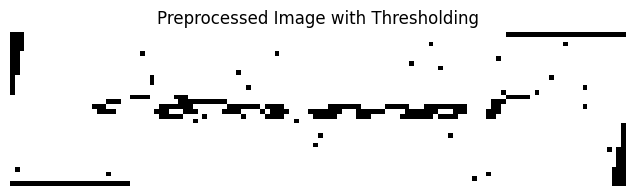

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step

Prediction Results:
--------------------------------------------------
Predicted Word: അഞ്ച്
Confidence: 100.00%

Top 3 Predictions:
--------------------------------------------------
അഞ്ച്: 100.00%
കടൽ: 0.00%
അർത്ഥം: 0.00%


'അഞ്ച്'

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import json
import os
import matplotlib.pyplot as plt

# Function to preprocess image for prediction and display it
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Could not read image at {image_path}")

    # Resize the image to the model's expected input size (32x128)
    img_resized = cv2.resize(img, (128, 32))

    # Apply Otsu's thresholding (binary thresholding)
    _, img_thresholded = cv2.threshold(img_resized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Normalize pixel values to the range [0, 1]
    img_thresholded = img_thresholded / 255.0

    # Add channel and batch dimensions
    img_thresholded = np.expand_dims(img_thresholded, axis=-1)  # Add channel dimension (grayscale)
    img_thresholded = np.expand_dims(img_thresholded, axis=0)   # Add batch dimension

    # Display the preprocessed image
    plt.figure(figsize=(10, 2))
    plt.imshow(img_thresholded[0, :, :, 0], cmap='gray')
    plt.title("Preprocessed Image with Thresholding")
    plt.axis('off')
    plt.show()

    return img_thresholded

# Function to save the correct class mapping from the train folder
def save_label_mapping(train_folder, mapping_file):
    class_labels = sorted(os.listdir(train_folder))  # Folder names inside train folder
    class_mapping = {label: idx for idx, label in enumerate(class_labels)}

    # Save the mapping to a JSON file
    with open(mapping_file, 'w', encoding='utf-8') as f:
        json.dump(class_mapping, f, ensure_ascii=False, indent=4)
    print("Label mapping saved successfully!")

# Function to load class mapping from a JSON file
def load_class_mapping(mapping_file):
    with open(mapping_file, 'r', encoding='utf-8') as f:
        class_mapping = json.load(f)
    # Create reverse mapping (index to label)
    index_to_label = {v: k for k, v in class_mapping.items()}
    return index_to_label

# Function to predict a single image
def predict_word(image_path, model, class_mapping):
    # Preprocess the input image
    img_array = preprocess_image(image_path)

    # Get predictions from the model
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])

    # Convert the prediction to a word using the class mapping
    predicted_word = class_mapping[predicted_class_index]
    confidence = predictions[0][predicted_class_index] * 100

    # Print the prediction results
    print("\nPrediction Results:")
    print("-" * 50)
    print(f"Predicted Word: {predicted_word}")
    print(f"Confidence: {confidence:.2f}%")

    # Display the top 3 predictions
    top_3_indices = np.argsort(predictions[0])[-3:][::-1]
    print("\nTop 3 Predictions:")
    print("-" * 50)
    for idx in top_3_indices:
        word = class_mapping[idx]
        conf = predictions[0][idx] * 100
        print(f"{word}: {conf:.2f}%")

    return predicted_word

# Function to test multiple images from a folder
def test_multiple_images(model_path, image_folder, label_mapping_path):
    # Load the trained model
    model = tf.keras.models.load_model(model_path)

    # Load the class mapping
    class_mapping = load_class_mapping(label_mapping_path)

    # Get a list of image files in the folder
    image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    print(f"\nTesting {len(image_files)} images...")
    print("-" * 50)

    # Predict each image
    for image_file in image_files:
        print(f"\nTesting image: {image_file}")
        image_path = os.path.join(image_folder, image_file)
        predict_word(image_path, model, class_mapping)
        print("-" * 50)

# Example usage for saving class mapping
train_folder = "/content/roboflow/train"  # Path to your train folder
mapping_file = "label_mapping.json"  # Path to save the label mapping
save_label_mapping(train_folder, mapping_file)

# Example usage for predicting a single image
model_path = "malayalam_word_recognition.h5"  # Path to your saved model
image_path = "/content/roboflow/test/അഞ്ച്/Screenshot-2025-01-02-103918_png_jpg.rf.f6f42aba6ad3a9841be95c2d43214deb.jpg"  # Path to your test image
label_mapping_path = "label_mapping.json"  # Path to your saved label mapping

# Load the model and class mapping
model = tf.keras.models.load_model(model_path)
class_mapping = load_class_mapping(label_mapping_path)

# Predict a single image
predict_word(image_path, model, class_mapping)

# Example usage for testing multiple images
# image_folder = "/content/dataset/test/അടയാളം"
# test_multiple_images(model_path, image_folder, label_mapping_path)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, LSTM, Bidirectional, Input, Reshape, Dropout
from tensorflow.keras.models import Model
import os

# Create the ImageDataGenerator with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1
)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Set your dataset path
dataset_path = "/content/roboflow"  # Update this to your dataset path

# Use the pre-existing directories for training, validation, and testing
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, 'train'),
    target_size=(64, 256),  # Increased image size
    color_mode='grayscale',
    batch_size=16,  # Reduced batch size
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    os.path.join(dataset_path, 'valid'),
    target_size=(64, 256),
    color_mode='grayscale',
    batch_size=16,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_path, 'test'),
    target_size=(64, 256),
    color_mode='grayscale',
    batch_size=16,
    class_mode='categorical',
    shuffle=False  # Typically no shuffle for test data
)

# Ensure consistent class mapping across generators
class_indices = train_generator.class_indices
validation_generator.class_indices = class_indices
test_generator.class_indices = class_indices

# Define the CNN + LSTM model for sequence recognition
input_layer = Input(shape=(64, 256, 1))

# CNN feature extraction with 5 convolutional layers + Dropout
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(1, 2))(x)  # Adjusted pool size to prevent negative dimensions
x = Dropout(0.2)(x)

x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Dropout(0.2)(x)

# Reshape for sequence processing
x = Reshape((32, -1))(x)

# Bidirectional LSTM layers for sequence processing
x = Bidirectional(LSTM(256, return_sequences=True))(x)
x = Dropout(0.3)(x)
x = Bidirectional(LSTM(128, return_sequences=False))(x)
x = Dropout(0.3)(x)

# Dense layers for classification
x = Dense(256, activation='relu')(x)
output_layer = Dense(len(class_indices), activation='softmax')(x)

# Create and compile the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Reduced learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

# Train the model with early stopping
model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=100,
    # callbacks=[tf.keras.callbacks.EarlyStopping(
    #     monitor='val_loss',
    #     patience=10,  # Patience for early stopping
    #     restore_best_weights=True
    # )]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Save the model
model.save("malayalam_word_recognition.h5")


Found 8811 images belonging to 254 classes.
Found 866 images belonging to 254 classes.
Found 389 images belonging to 250 classes.


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 64, 256, 1)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 64, 256, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 32, 128, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32, 128, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 32, 128, 64)         │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 16, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 16, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 8, 32, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 8, 32, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 8, 32, 256)          │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 8, 16, 256)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 8, 16, 256)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 8, 16, 512)          │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 8, 16, 512)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_2 (Reshape)                  │ (None, 32, 2048)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ (None, 32, 512)             │       4,720,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 32, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 256)                 │         656,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 7,076,094 (26.99 MB)

 Trainable params: 7,076,094 (26.99 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


551/551 ━━━━━━━━━━━━━━━━━━━━ 50s 81ms/step - accuracy: 0.0061 - loss: 5.5299 - val_accuracy: 0.0104 - val_loss: 5.5018
Epoch 2/100
551/551 ━━━━━━━━━━━━━━━━━━━━ 80s 78ms/step - accuracy: 0.0086 - loss: 5.4958 - val_accuracy: 0.0104 - val_loss: 5.4954
Epoch 3/100
551/551 ━━━━━━━━━━━━━━━━━━━━ 84s 81ms/step - accuracy: 0.0097 - loss: 5.4768 - val_accuracy: 0.0115 - val_loss: 5.4579
Epoch 4/100
551/551 ━━━━━━━━━━━━━━━━━━━━ 43s 78ms/step - accuracy: 0.0110 - loss: 5.3797 - val_accuracy: 0.0104 - val_loss: 5.4351
Epoch 5/100
551/551 ━━━━━━━━━━━━━━━━━━━━ 44s 79ms/step - accuracy: 0.0141 - loss: 5.1905 - val_accuracy: 0.0139 - val_loss: 5.2884
Epoch 6/100
551/551 ━━━━━━━━━━━━━━━━━━━━ 81s 78ms/step - accuracy: 0.0192 - loss: 5.0776 - val_accuracy: 0.0173 - val_loss: 5.2539
Epoch 7/100
551/551 ━━━━━━━━━━━━━━━━━━━━ 45s 80ms/step - accuracy: 0.0224 - loss: 4.9811 - val_accuracy: 0.0162 - val_loss: 5.4605
Epoch 8/100
551/551 ━━━━━━━━━━━━━━━━━━━━ 45s 80ms/step - accuracy: 0.0230 - loss: 4.8807 - val_

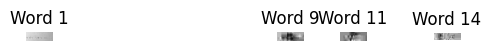

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_into_words(image_path):
    """
    Segments an image into individual words by identifying bounding boxes.

    Args:
        image_path (str): Path to the input image.

    Returns:
        list: List of segmented word images.
    """
    # Read the input image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply binary thresholding
    _, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Dilate the image to connect components
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))  # Adjust kernel size as needed
    dilated_image = cv2.dilate(binary_image, kernel, iterations=1)

    # Find contours
    contours, _ = cv2.findContours(dilated_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sort contours from left to right
    contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

    segmented_word_images = []

    for i, contour in enumerate(contours):
        # Get bounding box
        x, y, w, h = cv2.boundingRect(contour)

        # Filter out small contours (noise)
        if w > 10 and h > 10:  # Adjust the minimum width and height as needed
            # Extract the word region
            word_image = image[y:y + h, x:x + w]
            segmented_word_images.append(word_image)

            # Save each word as an image (optional)
            cv2.imwrite(f"word_{i + 1}.png", word_image)

            # Plot the segmented word
            plt.subplot(1, len(contours), i + 1)
            plt.imshow(word_image, cmap='gray')
            plt.title(f"Word {i + 1}")
            plt.axis('off')

    plt.show()
    return segmented_word_images

# Example usage
segmented_words = segment_into_words("/content/WhatsApp Image 2025-01-10 at 13.29.30.jpeg")  # Replace with your image path

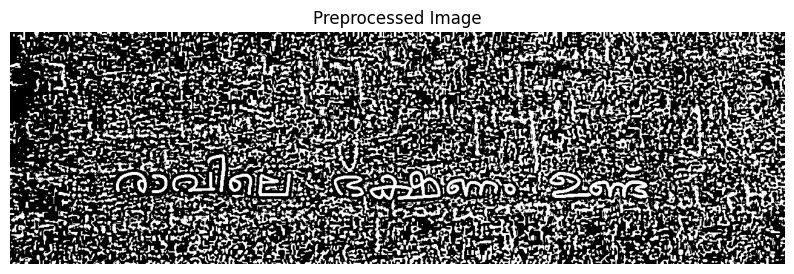

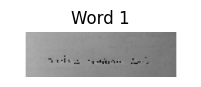

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image):
    """
    Preprocesses the input image by applying noise removal, contrast enhancement, and adaptive thresholding.

    Args:
        image (np.array): The input image in grayscale.

    Returns:
        np.array: The preprocessed image.
    """
    # Denoising using GaussianBlur
    denoised_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Contrast enhancement using histogram equalization
    equalized_image = cv2.equalizeHist(denoised_image)

    # Apply adaptive thresholding for better binarization
    thresholded_image = cv2.adaptiveThreshold(equalized_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                              cv2.THRESH_BINARY_INV, 11, 2)
    return thresholded_image

def segment_into_words(image_path):
    """
    Segments an image into individual words by identifying bounding boxes.

    Args:
        image_path (str): Path to the input image.

    Returns:
        list: List of segmented word images.
    """
    # Read the input image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Preprocess the image (denoise, enhance contrast, thresholding)
    preprocessed_image = preprocess_image(image)

    # Display the preprocessed image
    plt.figure(figsize=(10, 10))
    plt.imshow(preprocessed_image, cmap='gray')
    plt.title("Preprocessed Image")
    plt.axis('off')
    plt.show()

    # Apply morphological operations to separate connected components (words)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 5))  # Modify size of kernel for better separation
    dilated_image = cv2.dilate(preprocessed_image, kernel, iterations=1)

    # Find contours of the dilated image
    contours, _ = cv2.findContours(dilated_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sort contours from left to right
    contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

    # Initialize list to hold segmented word images
    segmented_word_images = []

    # Iterate through each contour to extract bounding boxes
    for i, contour in enumerate(contours):
        # Get bounding box coordinates
        x, y, w, h = cv2.boundingRect(contour)

        # Filter out small noise by setting a minimum width and height
        if w > 20 and h > 20:
            # Extract the word region
            word_image = image[y:y + h, x:x + w]

            # Maintain aspect ratio by padding the image
            target_size = (128, 32)
            word_image_resized = pad_and_resize(word_image, target_size)

            # Append the segmented word image to the list
            segmented_word_images.append(word_image_resized)

    # Display segmented word images
    display_segmented_words(segmented_word_images)

    return segmented_word_images


def pad_and_resize(image, target_size):
    """
    Pads and resizes an image to maintain its aspect ratio.

    Args:
        image (np.array): Input image.
        target_size (tuple): Target size (width, height).

    Returns:
        np.array: Resized image.
    """
    height, width = image.shape
    target_width, target_height = target_size

    # Calculate aspect ratio
    aspect_ratio = width / height

    # Calculate new dimensions while maintaining aspect ratio
    if aspect_ratio > target_width / target_height:
        new_width = target_width
        new_height = int(target_width / aspect_ratio)
    else:
        new_height = target_height
        new_width = int(target_height * aspect_ratio)

    # Resize the image
    resized_image = cv2.resize(image, (new_width, new_height))

    # Pad the image to the target size
    padded_image = np.full((target_height, target_width), 255, dtype=np.uint8)  # White padding
    y_offset = (target_height - new_height) // 2
    x_offset = (target_width - new_width) // 2
    padded_image[y_offset:y_offset + new_height, x_offset:x_offset + new_width] = resized_image

    return padded_image

def display_segmented_words(segmented_word_images):
    """
    Displays all segmented word images in a grid.

    Args:
        segmented_word_images (list): List of segmented word images.
    """
    # Determine the number of rows and columns for display
    num_words = len(segmented_word_images)
    cols = 4  # Set the number of columns in the grid
    rows = (num_words // cols) + (num_words % cols > 0)  # Calculate the number of rows needed

    # Create a figure for displaying the segmented words
    plt.figure(figsize=(cols * 2, rows * 2))

    for i, word_image in enumerate(segmented_word_images):
        plt.subplot(rows, cols, i + 1)  # Create subplots in grid layout
        plt.imshow(word_image, cmap='gray')
        plt.title(f"Word {i + 1}")
        plt.axis('off')

    # Show the plot with segmented words
    plt.tight_layout()
    plt.show()


# Example usage
segmented_words = segment_into_words("/content/WhatsApp Image 2025-01-10 at 13.29.30.jpeg")  # Replace with your image path


import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the pre-trained EAST model
net = cv2.dnn.readNet('frozen_east_text_detection.pb')

# Load the image and get its dimensions
image = cv2.imread('/content/Screenshot 2025-01-09 144651.png')
orig = image.copy()
(H, W) = image.shape[:2]

# Resize the image to a multiple of 32
new_W = (W // 32) * 32
new_H = (H // 32) * 32
resized_image = cv2.resize(image, (new_W, new_H))

# Prepare the image for the network
blob = cv2.dnn.blobFromImage(resized_image, 1.0, (new_W, new_H), (123.68, 116.78, 103.94), swapRB=True, crop=False)
net.setInput(blob)

# Get the output layers
layer_names = [
    "feature_fusion/Conv_7/Sigmoid",
    "feature_fusion/concat_3",
]
(scores, geometry) = net.forward(layer_names)

# Decode the predictions
def decode_predictions(scores, geometry, conf_threshold=0.5):
    num_rows, num_cols = scores.shape[2:4]
    boxes = []
    confidences = []

    for y in range(num_rows):
        for x in range(num_cols):
            score = scores[0, 0, y, x]

            if score < conf_threshold:
                continue

            offset_x, offset_y = x * 4.0, y * 4.0
            angle = geometry[0, 4, y, x]
            cos = np.cos(angle)
            sin = np.sin(angle)

            h = geometry[0, 0, y, x] + geometry[0, 2, y, x]
            w = geometry[0, 1, y, x] + geometry[0, 3, y, x]

            end_x = int(offset_x + (cos * w) + (sin * h))
            end_y = int(offset_y - (sin * w) + (cos * h))
            start_x = int(offset_x - (cos * w) - (sin * h))
            start_y = int(offset_y + (sin * w) - (cos * h))

            boxes.append((start_x, start_y, end_x, end_y))
            confidences.append(float(score))

    return boxes, confidences

# Get boxes and confidences
boxes, confidences = decode_predictions(scores, geometry)

# Apply Non-Maximum Suppression to filter overlapping boxes
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Draw the bounding boxes on the original image
if len(indices) > 0:
    for i in indices.flatten():
        (start_x, start_y, end_x, end_y) = boxes[i]
        cv2.rectangle(orig, (start_x, start_y), (end_x, end_y), (0, 255, 0), 2)

# Display the result
cv2_imshow(orig)


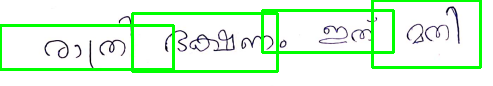

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the pre-trained EAST model
net = cv2.dnn.readNet('frozen_east_text_detection.pb')

# Load the image and get its dimensions
image = cv2.imread('/content/Screenshot 2025-01-09 144651.png')
orig = image.copy()
(H, W) = image.shape[:2]

# Resize the image to a multiple of 32
new_W = (W // 32) * 32
new_H = (H // 32) * 32
resized_image = cv2.resize(image, (new_W, new_H))

# Prepare the image for the network
blob = cv2.dnn.blobFromImage(resized_image, 1.0, (new_W, new_H), (123.68, 116.78, 103.94), swapRB=True, crop=False)
net.setInput(blob)

# Get the output layers
layer_names = [
    "feature_fusion/Conv_7/Sigmoid",
    "feature_fusion/concat_3",
]
(scores, geometry) = net.forward(layer_names)

# Decode the predictions
def decode_predictions(scores, geometry, conf_threshold=0.5):
    num_rows, num_cols = scores.shape[2:4]
    boxes = []
    confidences = []

    for y in range(num_rows):
        for x in range(num_cols):
            score = scores[0, 0, y, x]

            if score < conf_threshold:
                continue

            # Compute the offset
            offset_x, offset_y = x * 4.0, y * 4.0

            # Get the rotation angle
            angle = geometry[0, 4, y, x]
            cos = np.cos(angle)
            sin = np.sin(angle)

            # Get the box dimensions
            h = geometry[0, 0, y, x] + geometry[0, 2, y, x]
            w = geometry[0, 1, y, x] + geometry[0, 3, y, x]

            # Calculate the bounding box coordinates
            end_x = int(offset_x + (cos * w) + (sin * h))
            end_y = int(offset_y - (sin * w) + (cos * h))
            start_x = int(offset_x - (cos * w) - (sin * h))
            start_y = int(offset_y + (sin * w) - (cos * h))

            # Add padding to the bounding box
            padding = 5
            start_x = max(0, start_x - padding)
            start_y = max(0, start_y - padding)
            end_x = min(W, end_x + padding)
            end_y = min(H, end_y + padding)

            # Append the box and confidence score
            boxes.append((start_x, start_y, end_x, end_y))
            confidences.append(float(score))

    return boxes, confidences

# Get boxes and confidences
boxes, confidences = decode_predictions(scores, geometry)

# Scale the boxes back to the original image size
ratio_w = W / float(new_W)
ratio_h = H / float(new_H)

scaled_boxes = []
for box in boxes:
    (start_x, start_y, end_x, end_y) = box
    start_x = int(start_x * ratio_w)
    start_y = int(start_y * ratio_h)
    end_x = int(end_x * ratio_w)
    end_y = int(end_y * ratio_h)
    scaled_boxes.append((start_x, start_y, end_x, end_y))

# Apply Non-Maximum Suppression to filter overlapping boxes
indices = cv2.dnn.NMSBoxes(scaled_boxes, confidences, 0.5, 0.4)

# Draw the bounding boxes on the original image
if len(indices) > 0:
    for i in indices.flatten():
        (start_x, start_y, end_x, end_y) = scaled_boxes[i]
        cv2.rectangle(orig, (start_x, start_y), (end_x, end_y), (0, 255, 0), 2)

# Display the result
cv2_imshow(orig)


In [ ]:
!sudo apt-get install tesseract-ocr
!pip install pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,416 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

Saved: word_1.png


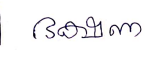

Saved: word_2.png


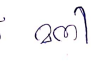

Saved: word_3.png


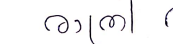

Saved: word_4.png


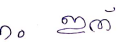

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the pre-trained EAST model
net = cv2.dnn.readNet('frozen_east_text_detection.pb')

# Load the image and get its dimensions
image = cv2.imread('/content/Screenshot 2025-01-09 144651.png')
orig = image.copy()
(H, W) = image.shape[:2]

# Resize the image to a multiple of 32
new_W = (W // 32) * 32
new_H = (H // 32) * 32
resized_image = cv2.resize(image, (new_W, new_H))

# Prepare the image for the network
blob = cv2.dnn.blobFromImage(resized_image, 1.0, (new_W, new_H), (123.68, 116.78, 103.94), swapRB=True, crop=False)
net.setInput(blob)

# Get the output layers
layer_names = [
    "feature_fusion/Conv_7/Sigmoid",
    "feature_fusion/concat_3",
]
(scores, geometry) = net.forward(layer_names)

# Decode the predictions
def decode_predictions(scores, geometry, conf_threshold=0.5):
    num_rows, num_cols = scores.shape[2:4]
    boxes = []
    confidences = []

    for y in range(num_rows):
        for x in range(num_cols):
            score = scores[0, 0, y, x]

            if score < conf_threshold:
                continue

            # Compute the offset
            offset_x, offset_y = x * 4.0, y * 4.0

            # Get the rotation angle
            angle = geometry[0, 4, y, x]
            cos = np.cos(angle)
            sin = np.sin(angle)

            # Get the box dimensions
            h = geometry[0, 0, y, x] + geometry[0, 2, y, x]
            w = geometry[0, 1, y, x] + geometry[0, 3, y, x]

            # Calculate the bounding box coordinates
            end_x = int(offset_x + (cos * w) + (sin * h))
            end_y = int(offset_y - (sin * w) + (cos * h))
            start_x = int(offset_x - (cos * w) - (sin * h))
            start_y = int(offset_y + (sin * w) - (cos * h))

            # Add padding to the bounding box
            padding = 5
            start_x = max(0, start_x - padding)
            start_y = max(0, start_y - padding)
            end_x = min(W, end_x + padding)
            end_y = min(H, end_y + padding)

            # Append the box and confidence score
            boxes.append((start_x, start_y, end_x, end_y))
            confidences.append(float(score))

    return boxes, confidences

# Get boxes and confidences
boxes, confidences = decode_predictions(scores, geometry)

# Scale the boxes back to the original image size
ratio_w = W / float(new_W)
ratio_h = H / float(new_H)

scaled_boxes = []
for box in boxes:
    (start_x, start_y, end_x, end_y) = box
    start_x = int(start_x * ratio_w)
    start_y = int(start_y * ratio_h)
    end_x = int(end_x * ratio_w)
    end_y = int(end_y * ratio_h)
    scaled_boxes.append((start_x, start_y, end_x, end_y))

# Apply Non-Maximum Suppression to filter overlapping boxes
indices = cv2.dnn.NMSBoxes(scaled_boxes, confidences, 0.5, 0.4)

# Crop and save each word segment
if len(indices) > 0:
    for i, index in enumerate(indices.flatten()):
        (start_x, start_y, end_x, end_y) = scaled_boxes[index]

        # Crop the detected region
        cropped_image = orig[start_y:end_y, start_x:end_x]

        # Save the cropped image
        file_name = f"word_{i + 1}.png"
        cv2.imwrite(file_name, cropped_image)
        print(f"Saved: {file_name}")

        # Optionally, display the cropped image
        cv2_imshow(cropped_image)


Saved: word_1.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step

Predicted Word: മതി with confidence: 88.82%


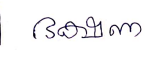

Saved: word_2.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Predicted Word: ചിരി with confidence: 74.20%


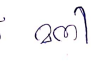

Saved: word_3.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Predicted Word: വിധി with confidence: 56.84%


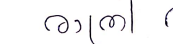

Saved: word_4.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Predicted Word: പൂവ് with confidence: 32.68%


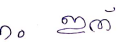

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import json
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Load the pre-trained EAST model
net = cv2.dnn.readNet('frozen_east_text_detection.pb')

# Function to preprocess image for prediction and display it
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Could not read image at {image_path}")

    # Resize the image to the model's expected input size (32x128)
    img_resized = cv2.resize(img, (128, 32))

    # Apply Otsu's thresholding (binary thresholding)
    _, img_thresholded = cv2.threshold(img_resized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Normalize pixel values to the range [0, 1]
    img_thresholded = img_thresholded / 255.0

    # Add channel and batch dimensions
    img_thresholded = np.expand_dims(img_thresholded, axis=-1)  # Add channel dimension (grayscale)
    img_thresholded = np.expand_dims(img_thresholded, axis=0)   # Add batch dimension

    return img_thresholded

# Function to load class mapping from a JSON file
def load_class_mapping(mapping_file):
    with open(mapping_file, 'r', encoding='utf-8') as f:
        class_mapping = json.load(f)
    # Create reverse mapping (index to label)
    index_to_label = {v: k for k, v in class_mapping.items()}
    return index_to_label

# Function to predict a single image
def predict_word(image_path, model, class_mapping):
    # Preprocess the input image
    img_array = preprocess_image(image_path)

    # Get predictions from the model
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])

    # Convert the prediction to a word using the class mapping
    predicted_word = class_mapping[predicted_class_index]
    confidence = predictions[0][predicted_class_index] * 100

    print(f"\nPredicted Word: {predicted_word} with confidence: {confidence:.2f}%")
    return predicted_word

# Function to decode predictions and get boxes from the EAST model
def decode_predictions(scores, geometry, conf_threshold=0.5):
    num_rows, num_cols = scores.shape[2:4]
    boxes = []
    confidences = []

    for y in range(num_rows):
        for x in range(num_cols):
            score = scores[0, 0, y, x]

            if score < conf_threshold:
                continue

            # Compute the offset
            offset_x, offset_y = x * 4.0, y * 4.0

            # Get the rotation angle
            angle = geometry[0, 4, y, x]
            cos = np.cos(angle)
            sin = np.sin(angle)

            # Get the box dimensions
            h = geometry[0, 0, y, x] + geometry[0, 2, y, x]
            w = geometry[0, 1, y, x] + geometry[0, 3, y, x]

            # Calculate the bounding box coordinates
            end_x = int(offset_x + (cos * w) + (sin * h))
            end_y = int(offset_y - (sin * w) + (cos * h))
            start_x = int(offset_x - (cos * w) - (sin * h))
            start_y = int(offset_y + (sin * w) - (cos * h))

            # Add padding to the bounding box
            padding = 5
            start_x = max(0, start_x - padding)
            start_y = max(0, start_y - padding)
            end_x = min(W, end_x + padding)
            end_y = min(H, end_y + padding)

            # Append the box and confidence score
            boxes.append((start_x, start_y, end_x, end_y))
            confidences.append(float(score))

    return boxes, confidences

# Load the image and get its dimensions
image = cv2.imread('/content/Screenshot 2025-01-09 144651.png')
orig = image.copy()
(H, W) = image.shape[:2]

# Resize the image to a multiple of 32
new_W = (W // 32) * 32
new_H = (H // 32) * 32
resized_image = cv2.resize(image, (new_W, new_H))

# Prepare the image for the network
blob = cv2.dnn.blobFromImage(resized_image, 1.0, (new_W, new_H), (123.68, 116.78, 103.94), swapRB=True, crop=False)
net.setInput(blob)

# Get the output layers
layer_names = [
    "feature_fusion/Conv_7/Sigmoid",
    "feature_fusion/concat_3",
]
(scores, geometry) = net.forward(layer_names)

# Get boxes and confidences
boxes, confidences = decode_predictions(scores, geometry)

# Scale the boxes back to the original image size
ratio_w = W / float(new_W)
ratio_h = H / float(new_H)

scaled_boxes = []
for box in boxes:
    (start_x, start_y, end_x, end_y) = box
    start_x = int(start_x * ratio_w)
    start_y = int(start_y * ratio_h)
    end_x = int(end_x * ratio_w)
    end_y = int(end_y * ratio_h)
    scaled_boxes.append((start_x, start_y, end_x, end_y))

# Apply Non-Maximum Suppression to filter overlapping boxes
indices = cv2.dnn.NMSBoxes(scaled_boxes, confidences, 0.5, 0.4)

# Load the model and class mapping
model_path = "malayalam_word_recognition.h5"  # Path to your saved model
label_mapping_path = "label_mapping.json"  # Path to your saved label mapping
model = tf.keras.models.load_model(model_path)
class_mapping = load_class_mapping(label_mapping_path)

# Crop, save, and predict each word segment
if len(indices) > 0:
    for i, index in enumerate(indices.flatten()):
        (start_x, start_y, end_x, end_y) = scaled_boxes[index]

        # Crop the detected region
        cropped_image = orig[start_y:end_y, start_x:end_x]

        # Save the cropped image
        file_name = f"word_{i + 1}.png"
        cv2.imwrite(file_name, cropped_image)
        print(f"Saved: {file_name}")

        # Predict the word
        predicted_word = predict_word(file_name, model, class_mapping)

        # Optionally, display the cropped image
        cv2_imshow(cropped_image)


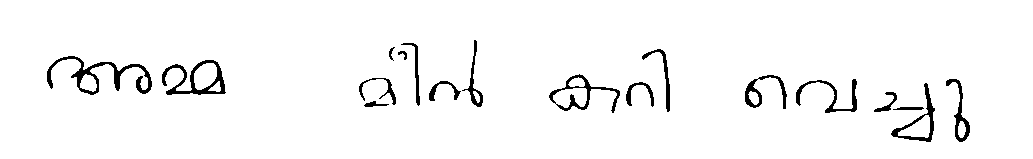

True

In [11]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image_path = '/content/Screenshot 2025-01-15 155144.png'  # Replace with your image path
image = cv2.imread(image_path)

# Step 1: Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 2: Scale the image by a factor (e.g., 1.5 means 150% of original size)
scale_factor = 1.5  # Change this value to scale up or down
width = int(gray_image.shape[1] * scale_factor)
height = int(gray_image.shape[0] * scale_factor)
scaled_image = cv2.resize(gray_image, (width, height))

# Step 3: Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(scaled_image, (5, 5), 0)

# Step 4: Apply thresholding to binarize the image
_, thresholded_image = cv2.threshold(blurred_image, 127, 255, cv2.THRESH_BINARY)

# Step 5: Perform histogram equalization to enhance contrast
equalized_image = cv2.equalizeHist(thresholded_image)

# Display the processed image
cv2_imshow(equalized_image)

# Save the processed image as a new file
cv2.imwrite('processed_output_scaled.jpg', equalized_image)


Label mapping saved successfully!


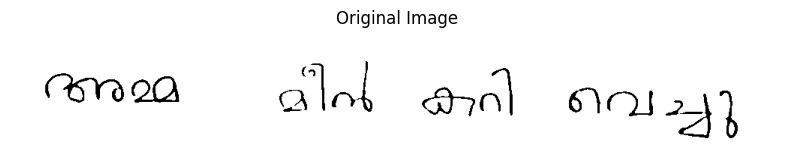

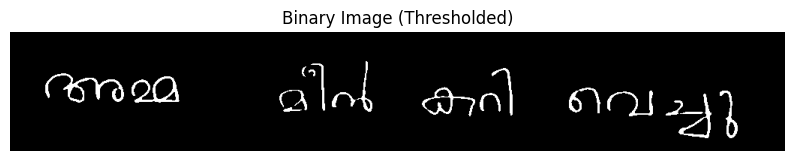

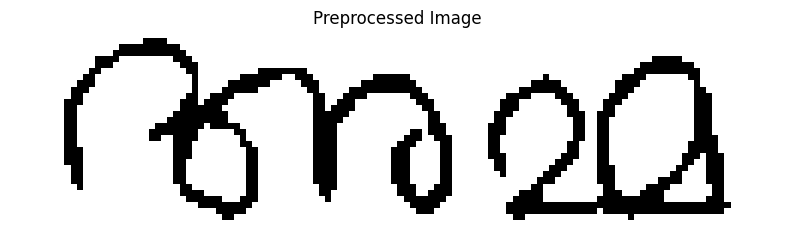

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
Predicted Word: അടി with confidence: 41.72%
Predicted Word 1: അടി


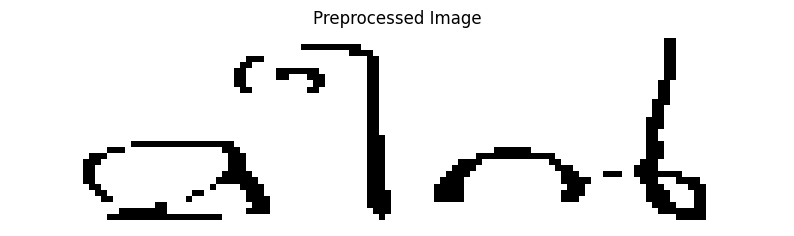

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Word: മടി with confidence: 51.12%
Predicted Word 2: മടി


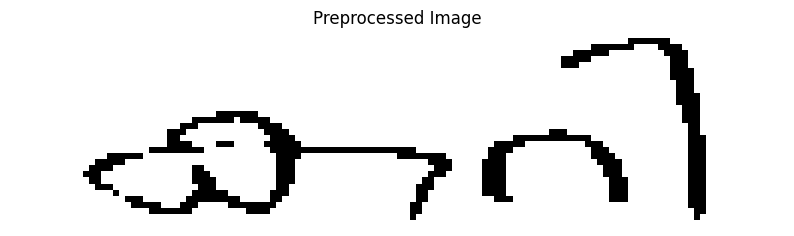

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Word: മടി with confidence: 99.83%
Predicted Word 3: മടി


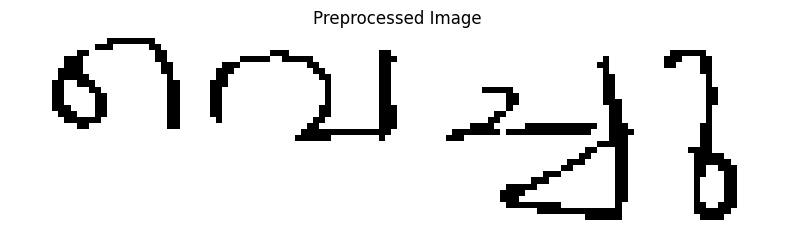

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Word: കടി with confidence: 61.78%
Predicted Word 4: കടി


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import json
import os

# Segmenting image into words (first part of your code)
def segment_into_words(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilated_image = cv2.dilate(binary_image, kernel, iterations=1)
    contours, _ = cv2.findContours(dilated_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])
    segmented_word_images = []

    for i, contour in enumerate(contours):
        x, y, w, h = cv2.boundingRect(contour)
        if w > 10 and h > 10:  # Filter out noise
            word_image = image[y:y + h, x:x + w]
            segmented_word_images.append(word_image)
            # Optional: save the word images
            cv2.imwrite(f"word_{i + 1}.png", word_image)

    # Display the segmented image
    plt.figure(figsize=(10, 6))
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

    # Display the binary image (after thresholding)
    plt.figure(figsize=(10, 6))
    plt.imshow(binary_image, cmap='gray')
    plt.title("Binary Image (Thresholded)")
    plt.axis('off')
    plt.show()

    return segmented_word_images

# Preprocessing and prediction (second part of your code)
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Could not read image at {image_path}")
    img_resized = cv2.resize(img, (128, 32))
    _, img_thresholded = cv2.threshold(img_resized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    img_thresholded = img_thresholded / 255.0
    img_thresholded = np.expand_dims(img_thresholded, axis=-1)  # Add channel
    img_thresholded = np.expand_dims(img_thresholded, axis=0)  # Add batch dimension

    # Display the preprocessed image
    plt.figure(figsize=(10, 6))
    plt.imshow(img_thresholded[0, :, :, 0], cmap='gray')
    plt.title("Preprocessed Image")
    plt.axis('off')
    plt.show()

    return img_thresholded

# Function to save the correct class mapping from the train folder
def save_label_mapping(train_folder, mapping_file):
    class_labels = sorted(os.listdir(train_folder))  # Folder names inside train folder
    class_mapping = {label: idx for idx, label in enumerate(class_labels)}

    # Save the mapping to a JSON file
    with open(mapping_file, 'w', encoding='utf-8') as f:
        json.dump(class_mapping, f, ensure_ascii=False, indent=4)
    print("Label mapping saved successfully!")

# Example usage to save the label mapping
train_folder = "/content/roboflow/train"  # Replace with the path to your train folder
mapping_file = "label_mapping.json"  # Path to save the label mapping
save_label_mapping(train_folder, mapping_file)

def load_class_mapping(mapping_file):
    with open(mapping_file, 'r', encoding='utf-8') as f:
        class_mapping = json.load(f)
    index_to_label = {v: k for k, v in class_mapping.items()}
    return index_to_label

def predict_word(image_path, model, class_mapping):
    img_array = preprocess_image(image_path)
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    predicted_word = class_mapping[predicted_class_index]
    confidence = predictions[0][predicted_class_index] * 100
    print(f"Predicted Word: {predicted_word} with confidence: {confidence:.2f}%")
    return predicted_word

# Path setup
image_path = "/content/processed_output_scaled.jpg"  # Input image path
model_path = "malayalam_word_recognition.h5"  # Path to your trained model
label_mapping_path = "label_mapping.json"  # Path to your label mapping file

# Load the model and class mapping
model = tf.keras.models.load_model(model_path)
class_mapping = load_class_mapping(label_mapping_path)

# Segment the image into words
segmented_words = segment_into_words(image_path)

# Predict each segmented word
for i, word_image in enumerate(segmented_words):
    word_image_path = f"word_{i + 1}.png"
    cv2.imwrite(word_image_path, word_image)
    predicted_word = predict_word(word_image_path, model, class_mapping)
    print(f"Predicted Word {i + 1}: {predicted_word}")


In [13]:
!unzip /content/step1.zip -d /content/

Archive:  /content/step1.zip
   creating: /content/step1/
  inflating: /content/step1/Screenshot 2025-01-15 155144.png  
  inflating: /content/step1/Screenshot 2025-01-15 155148.png  
  inflating: /content/step1/Screenshot 2025-01-15 155155.png  
  inflating: /content/step1/Screenshot 2025-01-15 155159.png  
  inflating: /content/step1/Screenshot 2025-01-15 155203.png  
  inflating: /content/step1/Screenshot 2025-01-15 155208.png  
  inflating: /content/step1/Screenshot 2025-01-15 155212.png  
  inflating: /content/step1/Screenshot 2025-01-15 155219.png  
  inflating: /content/step1/Screenshot 2025-01-15 155223.png  
  inflating: /content/step1/Screenshot 2025-01-15 155233.png  
  inflating: /content/step1/Screenshot 2025-01-15 155238.png  
  inflating: /content/step1/Screenshot 2025-01-15 155243.png  
  inflating: /content/step1/Screenshot 2025-01-15 155246.png  
  inflating: /content/step1/Screenshot 2025-01-15 155252.png  
  inflating: /content/step1/Screenshot 2025-01-15 155259.png

Processed: Screenshot 2025-01-15 155447.png


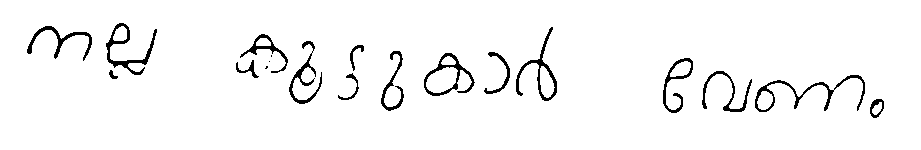

Processed: Screenshot 2025-01-15 155159.png


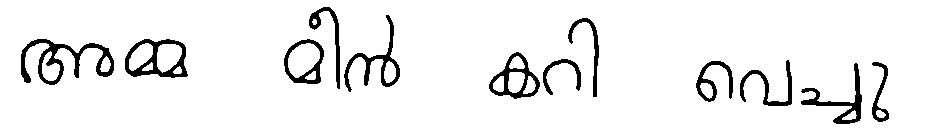

Processed: Screenshot 2025-01-15 155327.png


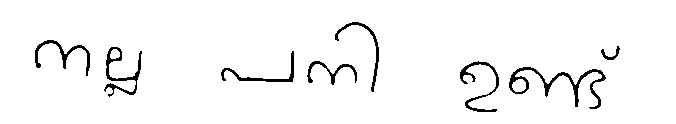

Processed: Screenshot 2025-01-15 155308.png


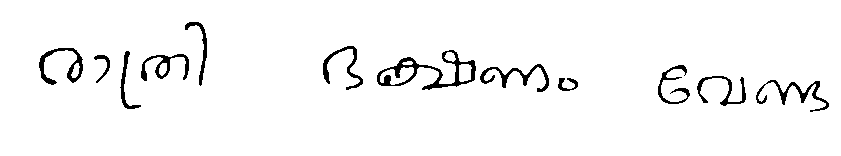

Processed: Screenshot 2025-01-15 155252.png


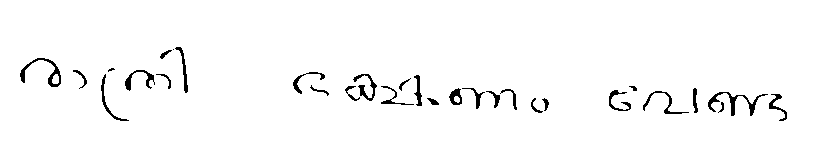

Processed: Screenshot 2025-01-15 155203.png


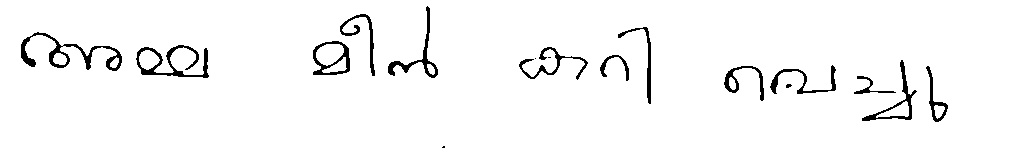

Processed: Screenshot 2025-01-15 155500.png


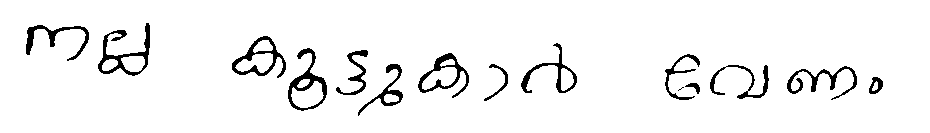

Processed: Screenshot 2025-01-15 155631.png


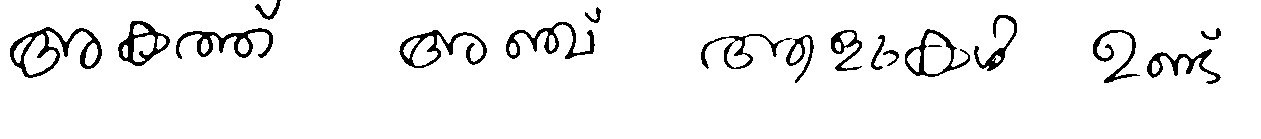

Processed: Screenshot 2025-01-15 155356.png


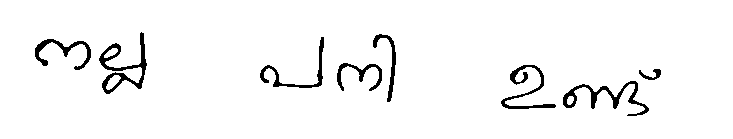

Processed: Screenshot 2025-01-15 155430.png


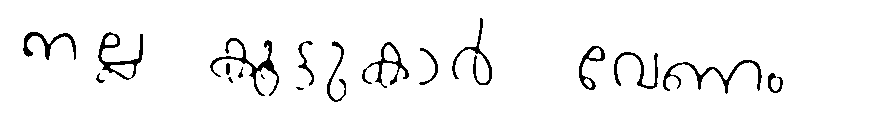

Processed: Screenshot 2025-01-15 155238.png


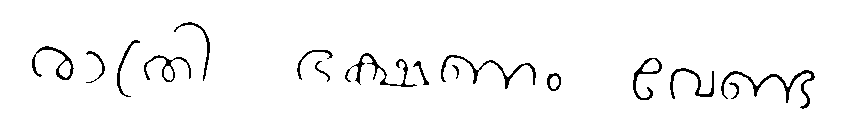

Processed: Screenshot 2025-01-15 155438.png


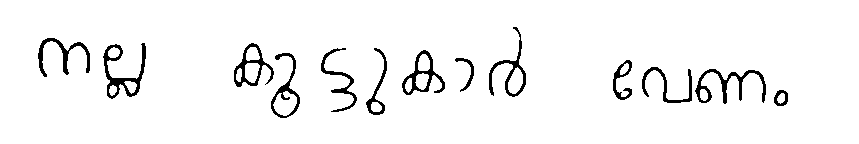

Processed: Screenshot 2025-01-15 155508.png


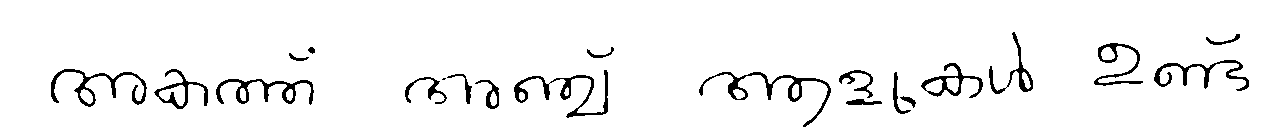

Processed: Screenshot 2025-01-15 155303.png


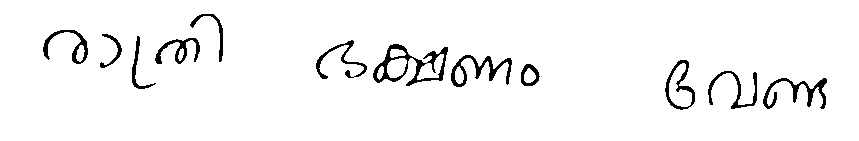

Processed: Screenshot 2025-01-15 155456.png


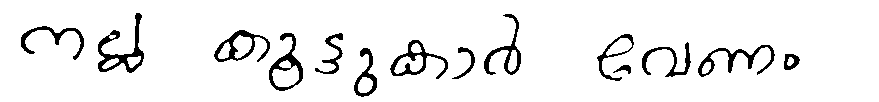

Processed: Screenshot 2025-01-15 155555.png


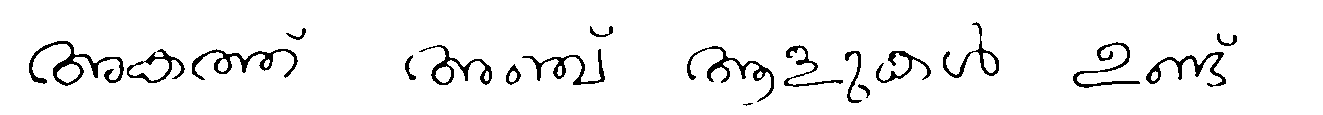

Processed: Screenshot 2025-01-15 155223.png


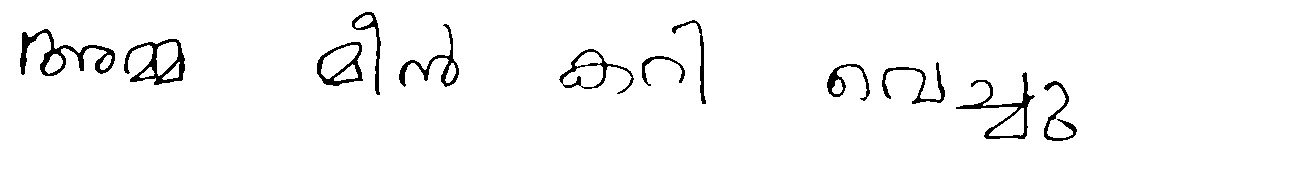

Processed: Screenshot 2025-01-15 155704.png


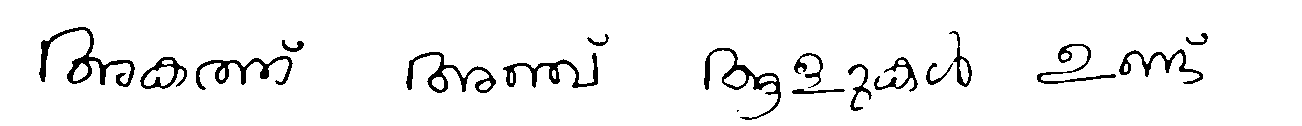

Processed: Screenshot 2025-01-15 155426.png


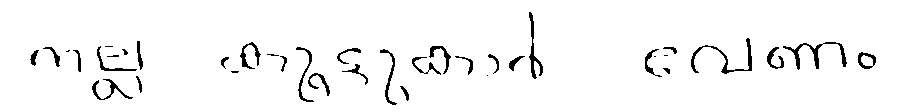

Processed: Screenshot 2025-01-15 155219.png


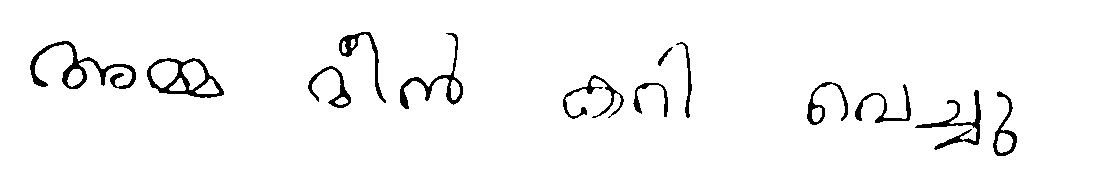

Processed: Screenshot 2025-01-15 155637.png


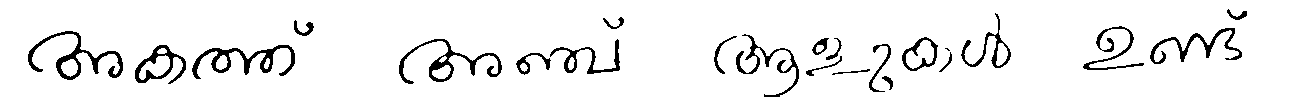

Processed: Screenshot 2025-01-15 155259.png


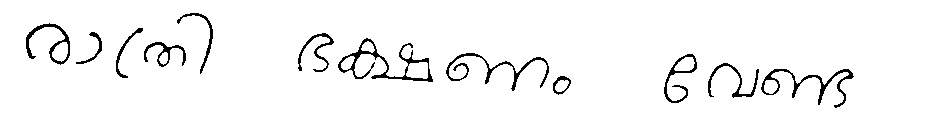

Processed: Screenshot 2025-01-15 155311.png


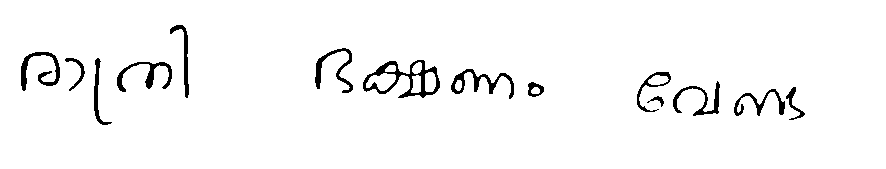

Processed: Screenshot 2025-01-15 155401.png


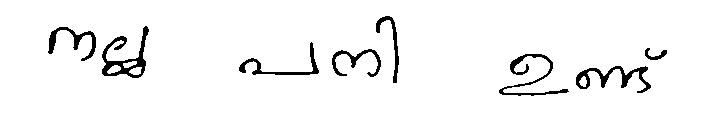

Processed: Screenshot 2025-01-15 155243.png


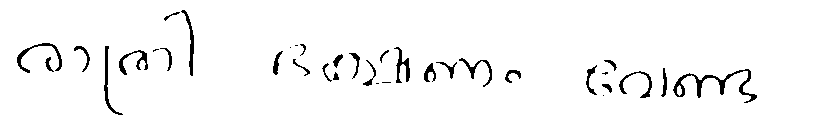

Processed: Screenshot 2025-01-15 155208.png


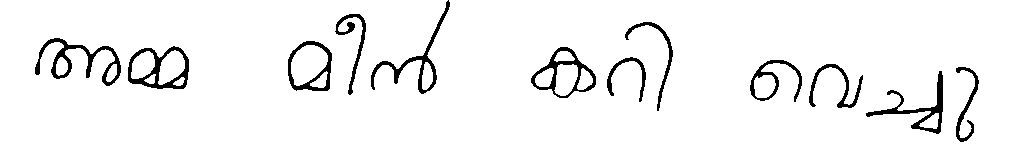

Processed: Screenshot 2025-01-15 155348.png


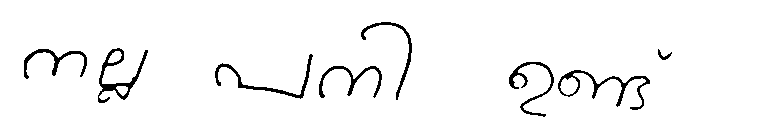

Processed: Screenshot 2025-01-15 155335.png


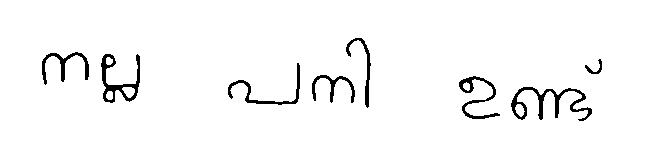

Processed: Screenshot 2025-01-15 155434.png


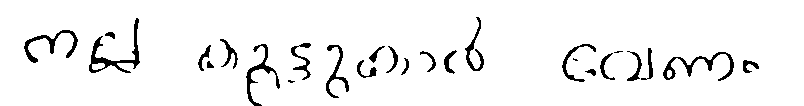

Processed: Screenshot 2025-01-15 155339.png


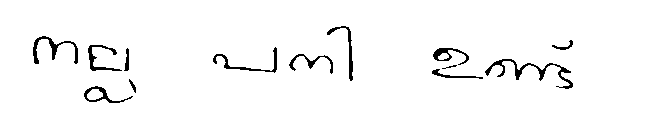

Processed: Screenshot 2025-01-15 155601.png


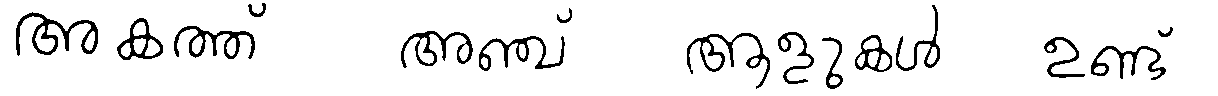

Processed: Screenshot 2025-01-15 155148.png


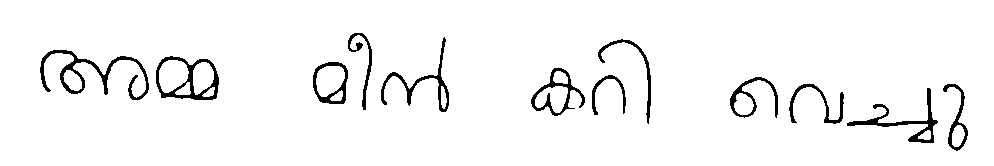

Processed: Screenshot 2025-01-15 155550.png


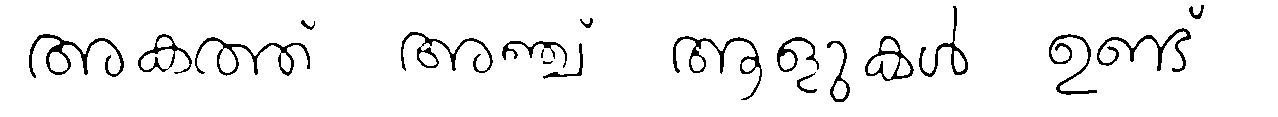

Processed: Screenshot 2025-01-15 155442.png


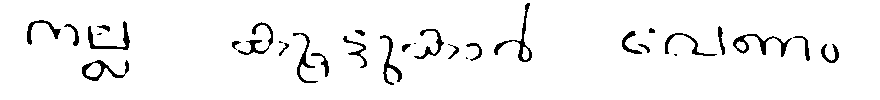

Processed: Screenshot 2025-01-15 155451.png


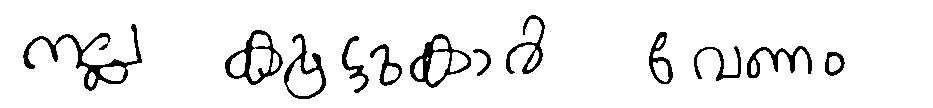

Processed: Screenshot 2025-01-15 155155.png


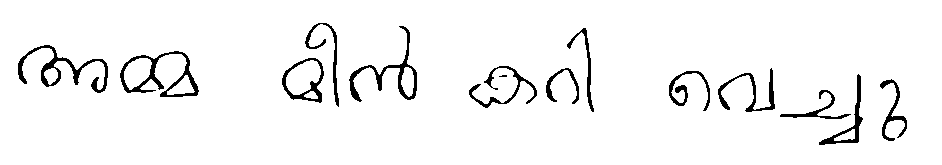

Processed: Screenshot 2025-01-15 155322.png


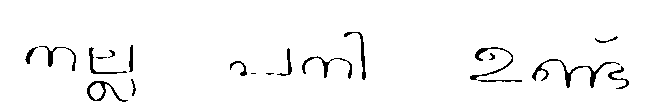

Processed: Screenshot 2025-01-15 155331.png


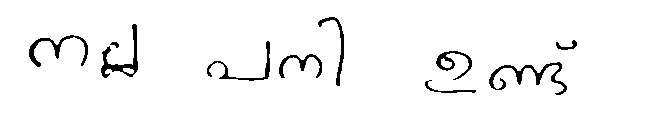

Processed: Screenshot 2025-01-15 155212.png


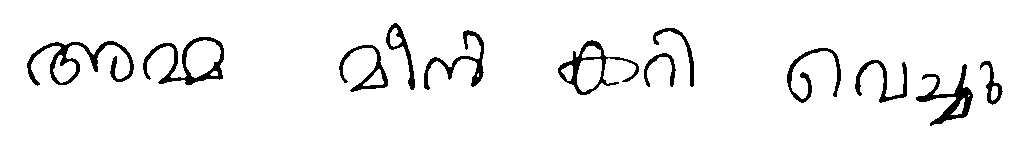

Processed: Screenshot 2025-01-15 155351.png


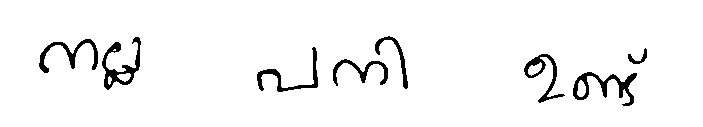

Processed: Screenshot 2025-01-15 155233.png


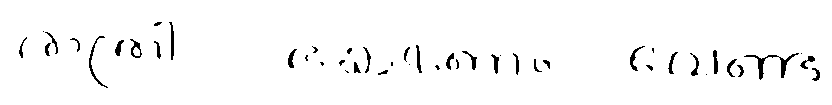

Processed: Screenshot 2025-01-15 155246.png


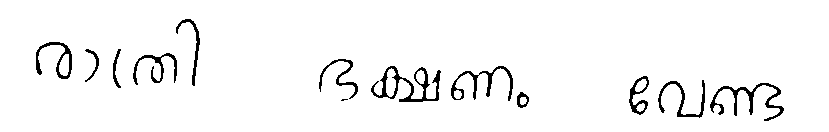

Processed: Screenshot 2025-01-15 155144.png


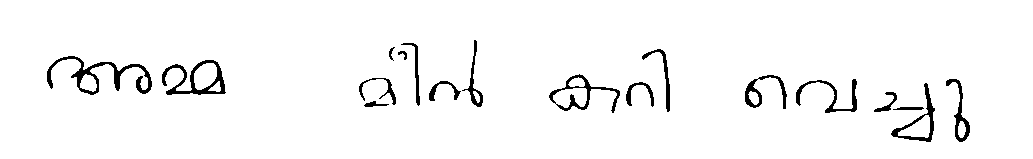

Processed: Screenshot 2025-01-15 155606.png


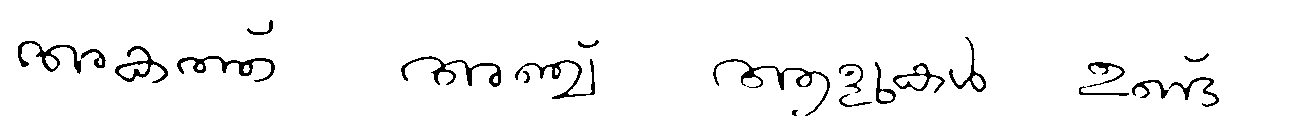

Processed: Screenshot 2025-01-15 155618.png


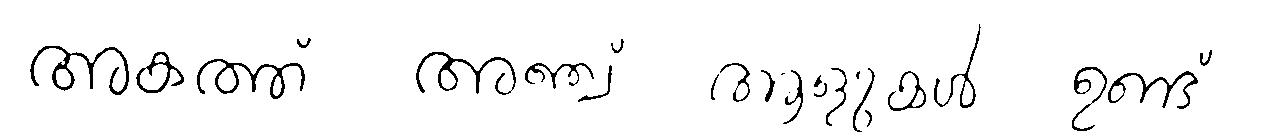

All processed images are saved to /content/output_images


In [14]:
import cv2
import os
from google.colab.patches import cv2_imshow

# Define the input folder (where your original images are stored)
input_folder = '/content/step1'  # Replace with your input folder path

# Define the output folder (where processed images will be saved)
output_folder = '/content/output_images'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Loop through all the images in the input folder
for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Construct the full input image path
        image_path = os.path.join(input_folder, filename)

        # Load the image
        image = cv2.imread(image_path)

        # Step 1: Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Step 2: Scale the image by a factor (e.g., 1.5 means 150% of original size)
        scale_factor = 1.5  # Change this value to scale up or down
        width = int(gray_image.shape[1] * scale_factor)
        height = int(gray_image.shape[0] * scale_factor)
        scaled_image = cv2.resize(gray_image, (width, height))

        # Step 3: Apply Gaussian blur to reduce noise
        blurred_image = cv2.GaussianBlur(scaled_image, (5, 5), 0)

        # Step 4: Apply thresholding to binarize the image
        _, thresholded_image = cv2.threshold(blurred_image, 127, 255, cv2.THRESH_BINARY)

        # Step 5: Perform histogram equalization to enhance contrast
        equalized_image = cv2.equalizeHist(thresholded_image)

        # Construct the output image path
        output_image_path = os.path.join(output_folder, f"processed_{filename}")

        # Save the processed image
        cv2.imwrite(output_image_path, equalized_image)

        # Optionally display the processed image (for debugging purposes)
        print(f"Processed: {filename}")
        cv2_imshow(equalized_image)

print(f"All processed images are saved to {output_folder}")

Processed: Screenshot 2025-01-15 155447.png


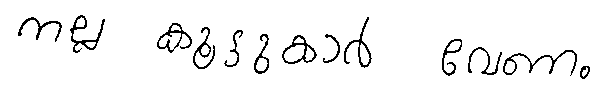

Processed: Screenshot 2025-01-15 155159.png


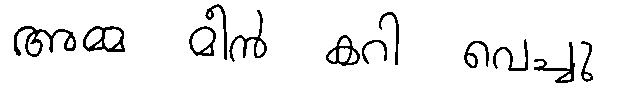

Processed: Screenshot 2025-01-15 155327.png


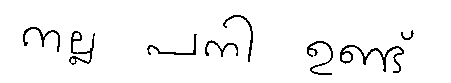

Processed: Screenshot 2025-01-15 155308.png


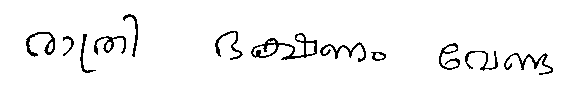

Processed: Screenshot 2025-01-15 155252.png


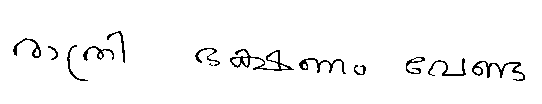

Processed: Screenshot 2025-01-15 155203.png


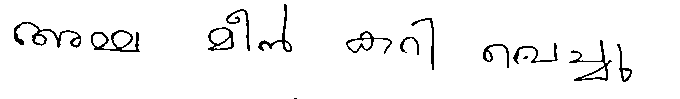

Processed: Screenshot 2025-01-15 155500.png


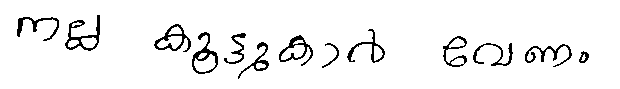

Processed: Screenshot 2025-01-15 155631.png


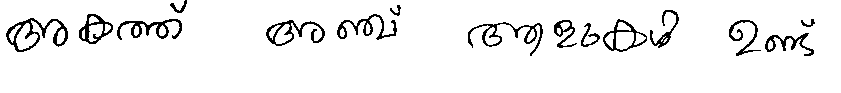

Processed: Screenshot 2025-01-15 155356.png


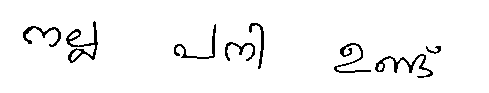

Processed: Screenshot 2025-01-15 155430.png


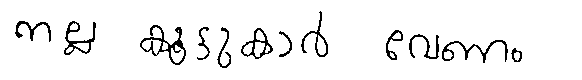

Processed: Screenshot 2025-01-15 155238.png


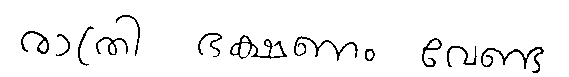

Processed: Screenshot 2025-01-15 155438.png


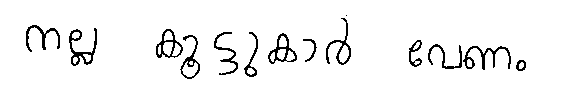

Processed: Screenshot 2025-01-15 155508.png


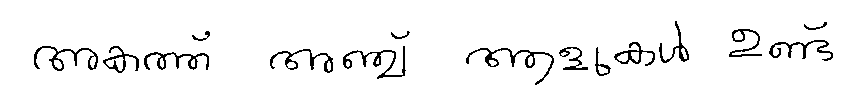

Processed: Screenshot 2025-01-15 155303.png


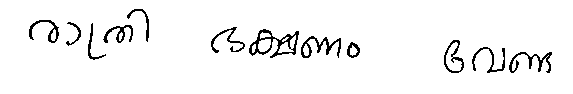

Processed: Screenshot 2025-01-15 155456.png


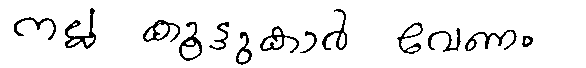

Processed: Screenshot 2025-01-15 155555.png


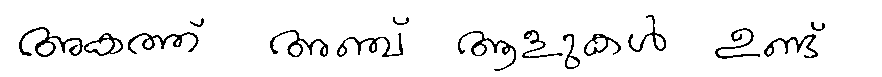

Processed: Screenshot 2025-01-15 155223.png


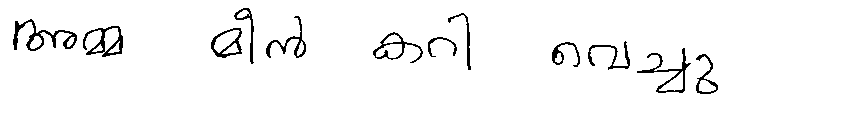

Processed: Screenshot 2025-01-15 155704.png


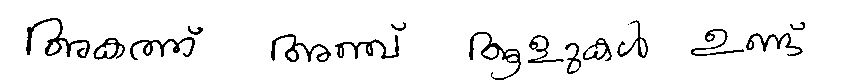

Processed: Screenshot 2025-01-15 155426.png


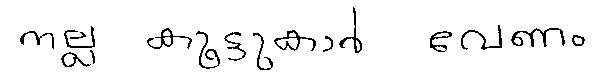

Processed: Screenshot 2025-01-15 155219.png


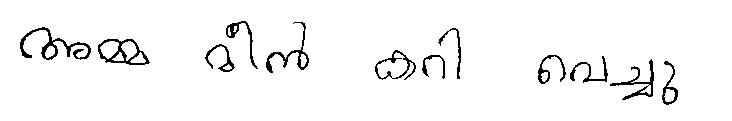

Processed: Screenshot 2025-01-15 155637.png


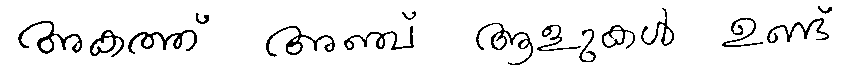

Processed: Screenshot 2025-01-15 155259.png


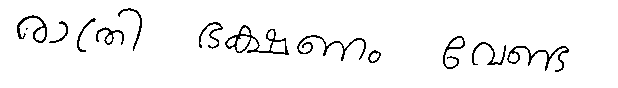

Processed: Screenshot 2025-01-15 155311.png


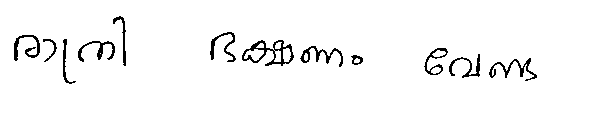

Processed: Screenshot 2025-01-15 155401.png


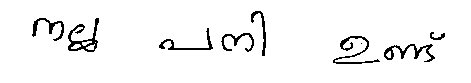

Processed: Screenshot 2025-01-15 155243.png


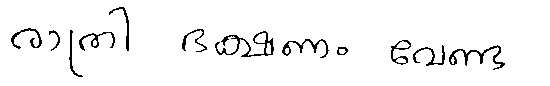

Processed: Screenshot 2025-01-15 155208.png


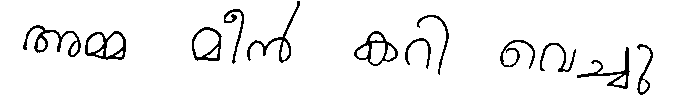

Processed: Screenshot 2025-01-15 155348.png


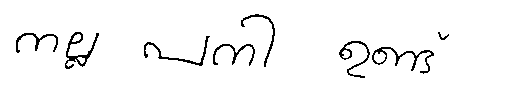

Processed: Screenshot 2025-01-15 155335.png


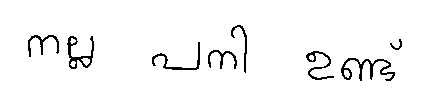

Processed: Screenshot 2025-01-15 155434.png


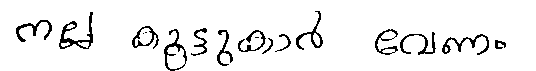

Processed: Screenshot 2025-01-15 155339.png


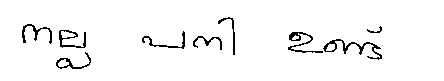

Processed: Screenshot 2025-01-15 155601.png


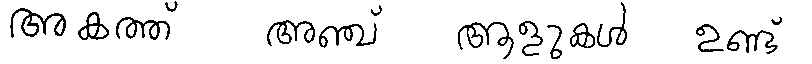

Processed: Screenshot 2025-01-15 155148.png


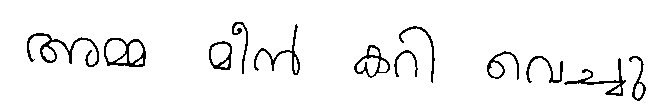

Processed: Screenshot 2025-01-15 155550.png


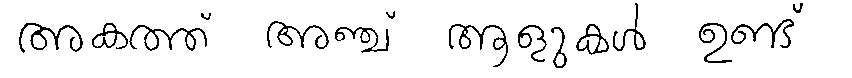

Processed: Screenshot 2025-01-15 155442.png


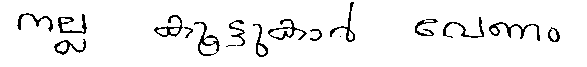

Processed: Screenshot 2025-01-15 155451.png


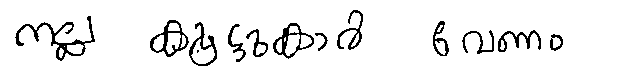

Processed: Screenshot 2025-01-15 155155.png


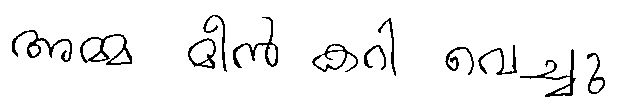

Processed: Screenshot 2025-01-15 155322.png


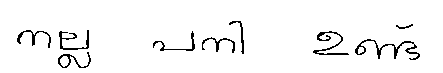

Processed: Screenshot 2025-01-15 155331.png


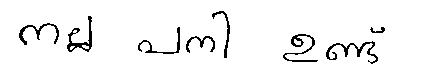

Processed: Screenshot 2025-01-15 155212.png


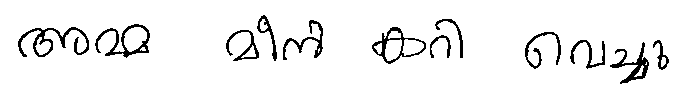

Processed: Screenshot 2025-01-15 155351.png


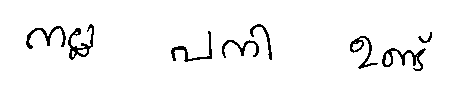

Processed: Screenshot 2025-01-15 155233.png


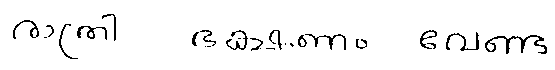

Processed: Screenshot 2025-01-15 155246.png


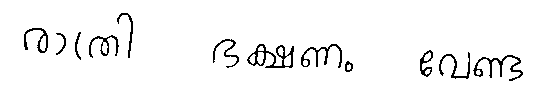

Processed: Screenshot 2025-01-15 155144.png


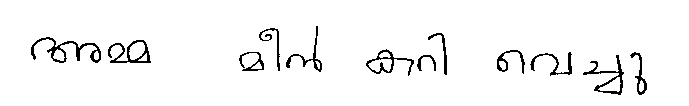

Processed: Screenshot 2025-01-15 155606.png


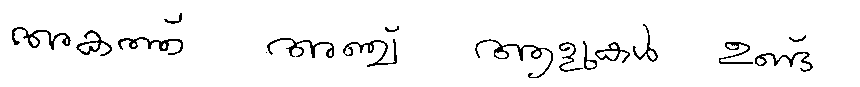

Processed: Screenshot 2025-01-15 155618.png


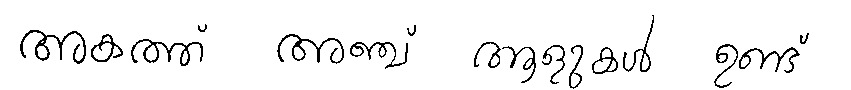

All processed images are saved to /content/output_images


In [15]:
import cv2
import os
from google.colab.patches import cv2_imshow

# Define the input folder (where your original images are stored)
input_folder = '/content/step1'  # Replace with your input folder path

# Define the output folder (where processed images will be saved)
output_folder = '/content/output_images'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Loop through all the images in the input folder
for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Construct the full input image path
        image_path = os.path.join(input_folder, filename)

        # Load the image in grayscale
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Apply thresholding to binarize the image (using Otsu's thresholding method)
        _, thresholded_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Construct the output image path
        output_image_path = os.path.join(output_folder, f"processed_{filename}")

        # Save the processed image
        cv2.imwrite(output_image_path, thresholded_image)

        # Optionally display the processed image (for debugging purposes)
        print(f"Processed: {filename}")
        cv2_imshow(thresholded_image)

print(f"All processed images are saved to {output_folder}")


In [16]:
import shutil
from google.colab import files

# Specify the folder path
folder_path = '/content/output_images'

# Compress the folder into a .zip file
shutil.make_archive('/content/folder_archive', 'zip', folder_path)

# Download the .zip file
files.download('/content/folder_archive.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import json
import os
import torch
from transformers import BertTokenizer, BertForMaskedLM

# -------------------------------
# Image Segmentation into Words
# -------------------------------
def segment_into_words(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilated_image = cv2.dilate(binary_image, kernel, iterations=1)
    contours, _ = cv2.findContours(dilated_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])
    segmented_word_images = []

    for i, contour in enumerate(contours):
        x, y, w, h = cv2.boundingRect(contour)
        if w > 10 and h > 10:
            word_image = image[y:y + h, x:x + w]
            segmented_word_images.append(word_image)
            cv2.imwrite(f"word_{i + 1}.png", word_image)

    return segmented_word_images

# -------------------------------
# Image Preprocessing
# -------------------------------
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (128, 32))
    _, img_thresholded = cv2.threshold(img_resized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    img_thresholded = img_thresholded / 255.0
    img_thresholded = np.expand_dims(img_thresholded, axis=-1)
    img_thresholded = np.expand_dims(img_thresholded, axis=0)
    return img_thresholded

# -------------------------------
# Load Class Mapping
# -------------------------------
def load_class_mapping(mapping_file):
    with open(mapping_file, 'r', encoding='utf-8') as f:
        class_mapping = json.load(f)
    return {v: k for k, v in class_mapping.items()}

# -------------------------------
# Predict Word Using CNN Model
# -------------------------------
def predict_word(image_path, model, class_mapping):
    img_array = preprocess_image(image_path)
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    predicted_word = class_mapping[predicted_class_index]
    return predicted_word

# -------------------------------
# BERT Correction
# -------------------------------
def correct_word_with_bert(predicted_word):
    # Load pre-trained BERT tokenizer and model
    tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
    model = BertForMaskedLM.from_pretrained("bert-base-multilingual-cased")

    # Tokenize the predicted word
    inputs = tokenizer(f"[MASK] {predicted_word} [MASK]", return_tensors="pt")

    # Predict the masked token
    with torch.no_grad():
        outputs = model(**inputs)
        predictions = outputs.logits

    # Get the top prediction for the masked tokens
    mask_token_indices = (inputs.input_ids == tokenizer.mask_token_id).nonzero(as_tuple=True)[1]
    corrected_word = predicted_word

    for idx in mask_token_indices:
        predicted_token_id = torch.argmax(predictions[0, idx]).item()
        corrected_token = tokenizer.decode(predicted_token_id)
        corrected_word = corrected_word.replace("[MASK]", corrected_token, 1)

    return corrected_word

# -------------------------------
# Main Code Execution
# -------------------------------
image_path = "/content/processed_output_scaled.jpg"
model_path = "malayalam_word_recognition.h5"
label_mapping_path = "label_mapping.json"

# Load model and class mapping
model = tf.keras.models.load_model(model_path)
class_mapping = load_class_mapping(label_mapping_path)

# Segment image into words
segmented_words = segment_into_words(image_path)

# Predict and correct each segmented word
for i, word_image in enumerate(segmented_words):
    word_image_path = f"word_{i + 1}.png"
    cv2.imwrite(word_image_path, word_image)

    # Step 1: Predict the word using your trained CNN model
    predicted_word = predict_word(word_image_path, model, class_mapping)
    print(f"Predicted Word {i + 1}: {predicted_word}")

    # Step 2: Correct the word using BERT
    corrected_word = correct_word_with_bert(predicted_word)
    print(f"Corrected Word {i + 1}: {corrected_word}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step
Predicted Word 1: തന്നെ


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Corrected Word 1: തന്നെ
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Word 2: ജില്ല


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Corrected Word 2: ജില്ല
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Word 3: കടി


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Corrected Word 3: കടി
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Word 4: മല്ലി


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Corrected Word 4: മല്ലി


Label mapping saved successfully!


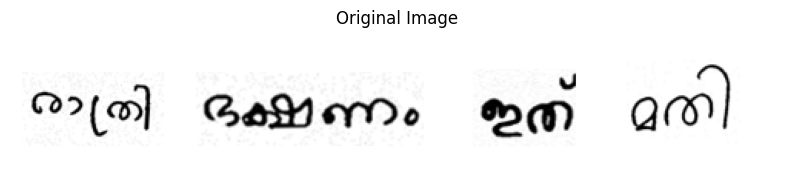

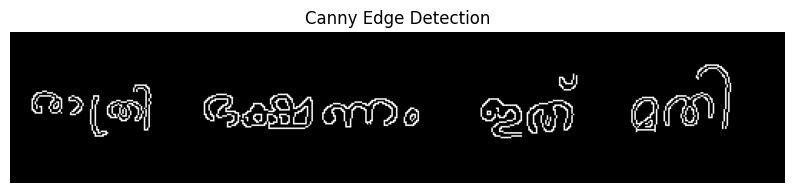

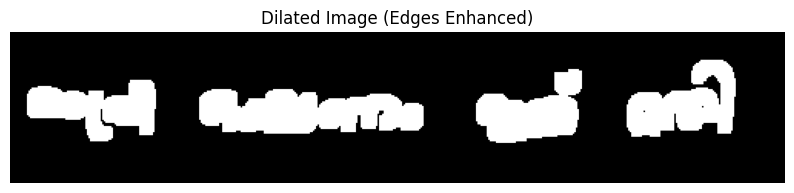

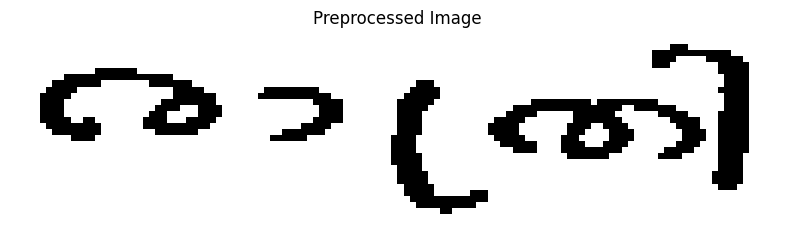

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
Predicted Word: അടി with confidence: 99.60%
Predicted Word 1: അടി


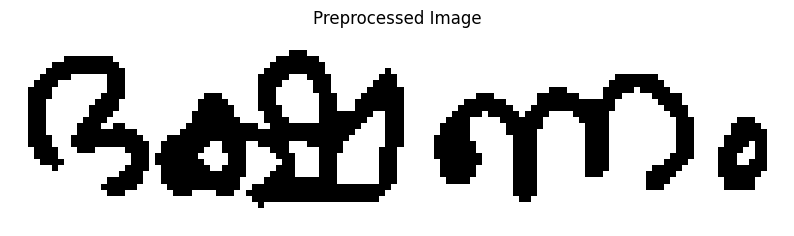

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Word: അടി with confidence: 40.05%
Predicted Word 2: അടി


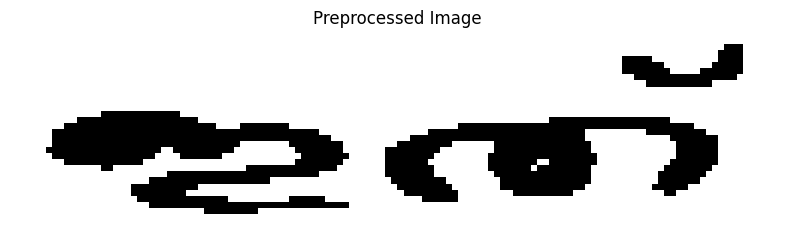

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Word: അടയാളം with confidence: 75.47%
Predicted Word 3: അടയാളം


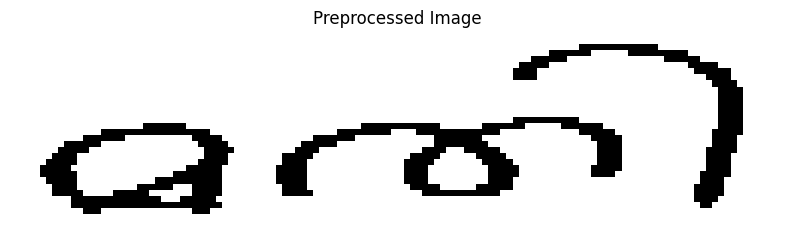

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Word: വില with confidence: 86.47%
Predicted Word 4: വില


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import json
import os

# Segmenting image into words (using Canny edge detection)
def segment_into_words(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error: Could not read image at {image_path}")
        return []

    # Display original image for debugging
    plt.figure(figsize=(10, 6))
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

    # Canny Edge Detection
    edges = cv2.Canny(image, 50, 150)  # Adjusted thresholds for better edge detection

    # Display Canny edges
    plt.figure(figsize=(10, 6))
    plt.imshow(edges, cmap='gray')
    plt.title("Canny Edge Detection")
    plt.axis('off')
    plt.show()

    # Dilation with a smaller kernel to enhance the edges
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))  # Larger kernel for better dilation
    dilated_image = cv2.dilate(edges, kernel, iterations=1)

    # Display dilated edges
    plt.figure(figsize=(10, 6))
    plt.imshow(dilated_image, cmap='gray')
    plt.title("Dilated Image (Edges Enhanced)")
    plt.axis('off')
    plt.show()

    # Find contours after dilation
    contours, _ = cv2.findContours(dilated_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours to remove noise (small areas)
    contours = [ctr for ctr in contours if cv2.contourArea(ctr) > 500]  # Area threshold to remove small contours

    # Sort contours from left to right
    contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

    segmented_word_images = []

    for i, contour in enumerate(contours):
        x, y, w, h = cv2.boundingRect(contour)
        word_image = image[y:y + h, x:x + w]
        segmented_word_images.append(word_image)
        # Optional: save the word images
        cv2.imwrite(f"word_{i + 1}.png", word_image)

    return segmented_word_images

# Preprocessing and prediction (same as before)
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Could not read image at {image_path}")
    img_resized = cv2.resize(img, (128, 32))
    _, img_thresholded = cv2.threshold(img_resized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    img_thresholded = img_thresholded / 255.0
    img_thresholded = np.expand_dims(img_thresholded, axis=-1)  # Add channel
    img_thresholded = np.expand_dims(img_thresholded, axis=0)  # Add batch dimension

    # Display the preprocessed image
    plt.figure(figsize=(10, 6))
    plt.imshow(img_thresholded[0, :, :, 0], cmap='gray')
    plt.title("Preprocessed Image")
    plt.axis('off')
    plt.show()

    return img_thresholded

# Function to save the correct class mapping from the train folder
def save_label_mapping(train_folder, mapping_file):
    class_labels = sorted(os.listdir(train_folder))  # Folder names inside train folder
    class_mapping = {label: idx for idx, label in enumerate(class_labels)}

    # Save the mapping to a JSON file
    with open(mapping_file, 'w', encoding='utf-8') as f:
        json.dump(class_mapping, f, ensure_ascii=False, indent=4)
    print("Label mapping saved successfully!")

# Example usage to save the label mapping
train_folder = "/content/roboflow/train"  # Replace with the path to your train folder
mapping_file = "label_mapping.json"  # Path to save the label mapping
save_label_mapping(train_folder, mapping_file)

def load_class_mapping(mapping_file):
    with open(mapping_file, 'r', encoding='utf-8') as f:
        class_mapping = json.load(f)
    index_to_label = {v: k for k, v in class_mapping.items()}
    return index_to_label

def predict_word(image_path, model, class_mapping):
    img_array = preprocess_image(image_path)
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    predicted_word = class_mapping[predicted_class_index]
    confidence = predictions[0][predicted_class_index] * 100
    print(f"Predicted Word: {predicted_word} with confidence: {confidence:.2f}%")
    return predicted_word

# Path setup
image_path = "/content/Screenshot 2025-01-11 140131.png"  # Input image path
model_path = "malayalam_word_recognition.h5"  # Path to your trained model
label_mapping_path = "label_mapping.json"  # Path to your label mapping file

# Load the model and class mapping
model = tf.keras.models.load_model(model_path)
class_mapping = load_class_mapping(label_mapping_path)

# Segment the image into words
segmented_words = segment_into_words(image_path)

# Predict each segmented word
for i, word_image in enumerate(segmented_words):
    word_image_path = f"word_{i + 1}.png"
    cv2.imwrite(word_image_path, word_image)
    predicted_word = predict_word(word_image_path, model, class_mapping)
    print(f"Predicted Word {i + 1}: {predicted_word}")


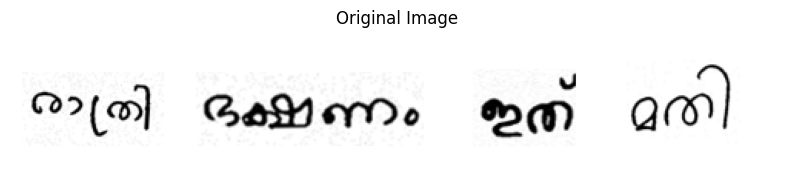

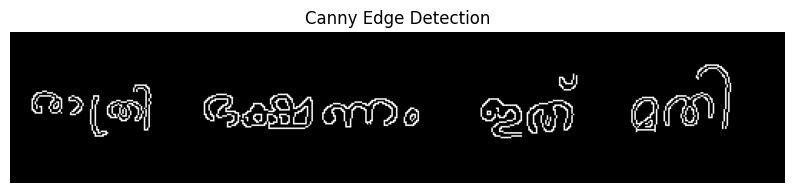

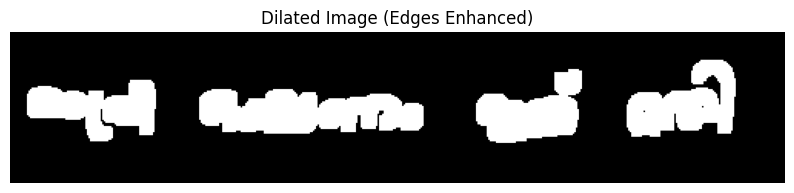

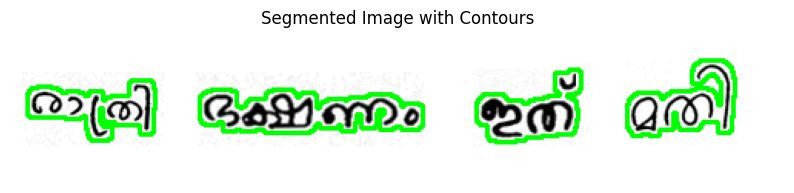

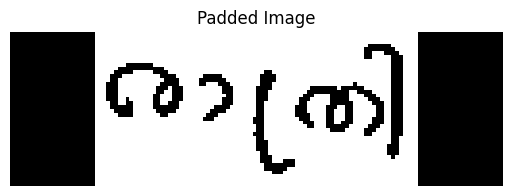

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step

Prediction Results:
--------------------------------------------------
Predicted Word: ആയി
Confidence: 26.92%

Top 3 Predictions:
--------------------------------------------------
ആയി: 26.92%
അടി: 21.72%
കരി: 11.91%
Predicted Word 1: ആയി


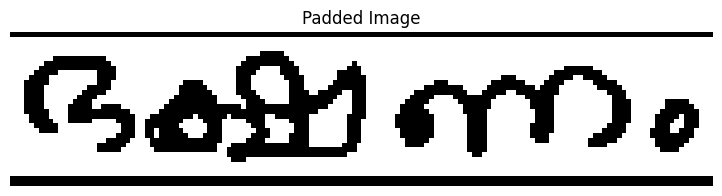

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

Prediction Results:
--------------------------------------------------
Predicted Word: വില
Confidence: 75.35%

Top 3 Predictions:
--------------------------------------------------
വില: 75.35%
അടി: 18.57%
ഇത്: 1.96%
Predicted Word 2: വില


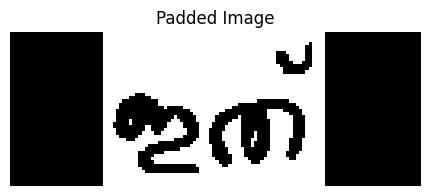

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

Prediction Results:
--------------------------------------------------
Predicted Word: കളി
Confidence: 77.02%

Top 3 Predictions:
--------------------------------------------------
കളി: 77.02%
മല്ലി: 9.36%
കവി: 6.89%
Predicted Word 3: കളി


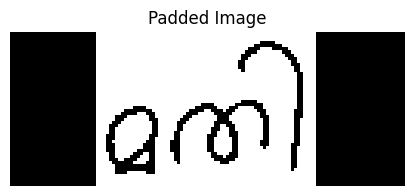

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

Prediction Results:
--------------------------------------------------
Predicted Word: എന്ന
Confidence: 21.55%

Top 3 Predictions:
--------------------------------------------------
എന്ന: 21.55%
നീല: 18.33%
ആയി: 14.60%
Predicted Word 4: എന്ന


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import json
import os

# Segmenting image into words (using Canny edge detection)
def segment_into_words(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error: Could not read image at {image_path}")
        return []

    # Display original image for debugging
    plt.figure(figsize=(10, 6))
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

    # Canny Edge Detection
    edges = cv2.Canny(image, 50, 150)  # Adjusted thresholds for better edge detection

    # Display Canny edges
    plt.figure(figsize=(10, 6))
    plt.imshow(edges, cmap='gray')
    plt.title("Canny Edge Detection")
    plt.axis('off')
    plt.show()

    # Dilation with a smaller kernel to enhance the edges
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))  # Larger kernel for better dilation
    dilated_image = cv2.dilate(edges, kernel, iterations=1)

    # Display dilated edges
    plt.figure(figsize=(10, 6))
    plt.imshow(dilated_image, cmap='gray')
    plt.title("Dilated Image (Edges Enhanced)")
    plt.axis('off')
    plt.show()

    # Find contours after dilation
    contours, _ = cv2.findContours(dilated_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours to remove noise (small areas)
    contours = [ctr for ctr in contours if cv2.contourArea(ctr) > 500]  # Area threshold to remove small contours

    # Sort contours from left to right
    contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

    segmented_word_images = []

    # Draw contours on the original image for visual display
    image_with_contours = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert to BGR for coloring the contours
    cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)  # Green contours

    # Display the segmented image with contours
    plt.figure(figsize=(10, 6))
    plt.imshow(image_with_contours)
    plt.title("Segmented Image with Contours")
    plt.axis('off')
    plt.show()

    for i, contour in enumerate(contours):
        x, y, w, h = cv2.boundingRect(contour)
        word_image = image[y:y + h, x:x + w]
        segmented_word_images.append(word_image)
        # Optional: save the word images
        cv2.imwrite(f"word_{i + 1}.png", word_image)

    return segmented_word_images

import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Could not read image at {image_path}")

    # Apply Otsu's thresholding (binary thresholding)
    _, img_thresholded = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Normalize pixel values to the range [0, 1]
    img_thresholded = img_thresholded / 255.0

    # Dimensions needed for model
    target_height = 32
    target_width = 128

    height, width = img_thresholded.shape  # Get height and width directly

    # Padding to ensure the image has dimensions (32, 128)
    # Padding height if needed to make it 32
    if height < target_height:
        top_padding = (target_height - height) // 2
        bottom_padding = target_height - height - top_padding
    else:
        top_padding = bottom_padding = 0

    # Padding width if needed to make it 128
    if width < target_width:
        left_padding = (target_width - width) // 2
        right_padding = target_width - width - left_padding
    else:
        left_padding = right_padding = 0

    # Apply padding (only 2 dimensions for grayscale image)
    img_padded = np.pad(img_thresholded,
                        ((top_padding, bottom_padding),
                         (left_padding, right_padding)),
                        mode='constant', constant_values=0)  # Fill with zeros (black padding)

    # Display the padded image
    plt.figure(figsize=(10, 2))
    plt.imshow(img_padded, cmap='gray')  # Display img_padded directly
    plt.title("Padded Image")
    plt.axis('off')
    plt.show()

    # Ensure the image has the shape (32, 128)
    img_padded_resized = cv2.resize(img_padded, (target_width, target_height))

    # Add the batch and channel dimensions
    img_resized = np.expand_dims(img_padded_resized, axis=0)  # Add batch dimension
    img_resized = np.expand_dims(img_resized, axis=-1)  # Add channel dimension (grayscale)

    return img_resized



# Function to save the correct class mapping from the train folder
def save_label_mapping(train_folder, mapping_file):
    class_labels = sorted(os.listdir(train_folder))  # Folder names inside train folder
    class_mapping = {label: idx for idx, label in enumerate(class_labels)}

    # Save the mapping to a JSON file
    with open(mapping_file, 'w', encoding='utf-8') as f:
        json.dump(class_mapping, f, ensure_ascii=False, indent=4)
    print("Label mapping saved successfully!")

# Function to load class mapping from a JSON file
def load_class_mapping(mapping_file):
    with open(mapping_file, 'r', encoding='utf-8') as f:
        class_mapping = json.load(f)
    # Create reverse mapping (index to label)
    index_to_label = {v: k for k, v in class_mapping.items()}
    return index_to_label

# Function to predict a single word from the preprocessed image
def predict_word(image_path, model, class_mapping):
    # Preprocess the input image
    img_array = preprocess_image(image_path)

    # Get predictions from the model
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])

    # Convert the prediction to a word using the class mapping
    predicted_word = class_mapping[predicted_class_index]
    confidence = predictions[0][predicted_class_index] * 100

    # Print the prediction results
    print("\nPrediction Results:")
    print("-" * 50)
    print(f"Predicted Word: {predicted_word}")
    print(f"Confidence: {confidence:.2f}%")

    # Display the top 3 predictions
    top_3_indices = np.argsort(predictions[0])[-3:][::-1]
    print("\nTop 3 Predictions:")
    print("-" * 50)
    for idx in top_3_indices:
        word = class_mapping[idx]
        conf = predictions[0][idx] * 100
        print(f"{word}: {conf:.2f}%")

    return predicted_word

# Main execution
def main(image_path, model_path, label_mapping_path):
    # Load the model and class mapping
    model = tf.keras.models.load_model(model_path)
    class_mapping = load_class_mapping(label_mapping_path)

    # Segment the image into words and display the segmented image with contours
    segmented_words = segment_into_words(image_path)

    # Predict each segmented word
    for i, word_image in enumerate(segmented_words):
        word_image_path = f"word_{i + 1}.png"
        cv2.imwrite(word_image_path, word_image)
        predicted_word = predict_word(word_image_path, model, class_mapping)
        print(f"Predicted Word {i + 1}: {predicted_word}")

# Example usage
image_path = "/content/Screenshot 2025-01-11 140131.png"  # Input image path
model_path = "malayalam_word_recognition.h5"  # Path to your trained model
label_mapping_path = "label_mapping.json"  # Path to your label mapping file

main(image_path, model_path, label_mapping_path)


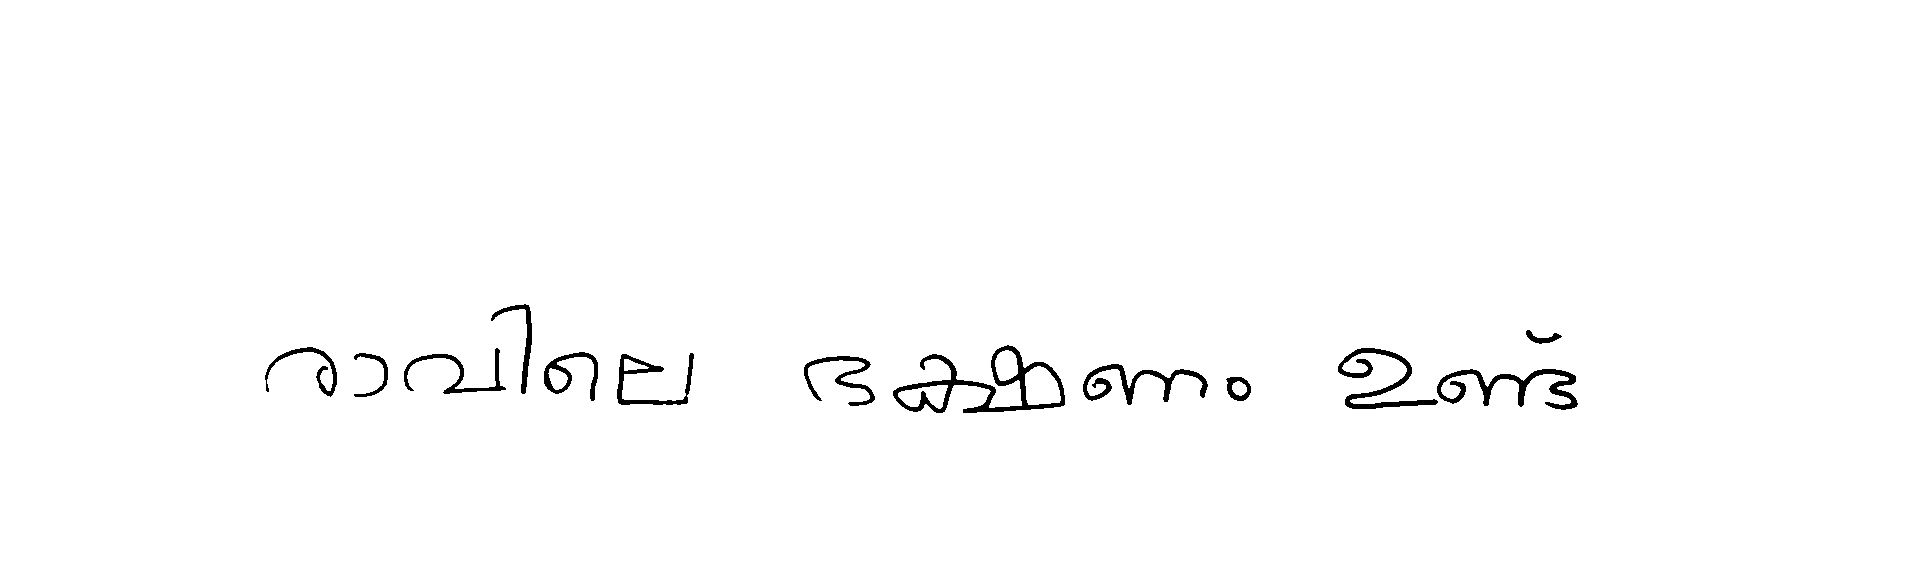

True

In [1]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image_path = '/content/WhatsApp Image 2025-01-10 at 13.29.30.jpeg'  # Replace with your image path
image = cv2.imread(image_path)

# Step 1: Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 2: Scale the image by a factor (e.g., 1.5 means 150% of original size)
scale_factor = 1.5  # Change this value to scale up or down
width = int(gray_image.shape[1] * scale_factor)
height = int(gray_image.shape[0] * scale_factor)
scaled_image = cv2.resize(gray_image, (width, height))

# Step 3: Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(scaled_image, (5, 5), 0)

# Step 4: Apply thresholding to binarize the image
_, thresholded_image = cv2.threshold(blurred_image, 127, 255, cv2.THRESH_BINARY)

# Step 5: Perform histogram equalization to enhance contrast
equalized_image = cv2.equalizeHist(thresholded_image)

# Display the processed image
cv2_imshow(equalized_image)

# Save the processed image as a new file
cv2.imwrite('processed_output_scaled.jpg', equalized_image)


In [11]:
!wget https://github.com/tesseract-ocr/tessdata/raw/main/mal.traineddata
!sudo mv mal.traineddata /usr/share/tesseract-ocr/4.00/tessdata/

--2025-01-15 09:17:17--  https://github.com/tesseract-ocr/tessdata/raw/main/mal.traineddata
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/mal.traineddata [following]
--2025-01-15 09:17:18--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/mal.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5953416 (5.7M) [application/octet-stream]
Saving to: ‘mal.traineddata’

mal.traineddata     100%[===================>]   5.68M  --.-KB/s    in 0.06s   

2025-01-15 09:17:19 (90.8 MB/s) - ‘mal.traineddata’ saved [5953416/5953416]



In [7]:
pip install pytesseract

In [12]:
!sudo apt-get install tesseract-ocr
!sudo apt-get install tesseract-ocr-mlang

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package tesseract-ocr-mlang


In [14]:
import pytesseract
from PIL import Image

# Load image
image = Image.open("/content/processed_output_scaled.jpg")

# OCR to extract text
text = pytesseract.image_to_string(image, lang='mal')

print("Extracted Text:", text)


Extracted Text: രാഷവ രക്ഥ്ലണം ൭൦൭



In [16]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [26]:
import torch
from transformers import BertTokenizer, BertForMaskedLM

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
model = BertForMaskedLM.from_pretrained("bert-base-multilingual-cased")

# Example OCR output with errors
ocr_text = "രാഷവ രക്ഥ്ലണം ൭൦൭"  # Erroneous OCR output

# Step 1: Tokenize the text and add [MASK] tokens where errors are likely
masked_text = ocr_text.replace("രാഷവ", "രാവിലെ").replace("രക്ഥ്ലണം", "ഭക്ഷണം").replace("൭൦൭", "ഉണ്ട്")

# Tokenize the masked text
inputs = tokenizer(masked_text, return_tensors="pt")

# Step 2: Predict masked tokens
with torch.no_grad():
    outputs = model(**inputs)
    predictions = outputs.logits

# Step 3: Find the top predicted tokens for each [MASK]
masked_indices = (inputs.input_ids == tokenizer.mask_token_id).nonzero(as_tuple=True)[1]
predicted_tokens = [tokenizer.decode(torch.argmax(predictions[0, idx]).item()) for idx in masked_indices]

# Step 4: Replace [MASK] tokens with predicted words
corrected_text = masked_text
for token in predicted_tokens:
    corrected_text = corrected_text.replace("[MASK]", token, 1)

# Output the corrected text
print("Original OCR Output: ", ocr_text)
print("Corrected Text: ", corrected_text)


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Original OCR Output:  രാഷവ രക്ഥ്ലണം ൭൦൭
Corrected Text:  രാവിലെ ഭക്ഷണം ഉണ്ട്


In [27]:
import pytesseract
from PIL import Image
import torch
from transformers import BertTokenizer, BertForMaskedLM

# -------------------------------
# Part 1: OCR to Extract Text from Image
# -------------------------------

# Load the image
image_path = "/content/processed_output_scaled.jpg"  # Change this to your image path
image = Image.open(image_path)

# Use pytesseract to extract text from the image
extracted_text = pytesseract.image_to_string(image, lang='mal')
print("Extracted Text:", extracted_text)

# -------------------------------
# Part 2: BERT-Based Error Correction
# -------------------------------

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
model = BertForMaskedLM.from_pretrained("bert-base-multilingual-cased")

# Step 1: Tokenize the extracted text and add [MASK] tokens where errors are likely
# Example approach: mask words with unusual characters or use a custom masking rule
words = extracted_text.split()
masked_text = []
for word in words:
    # You can customize this logic to detect errors
    if any(char.isdigit() for char in word) or len(word) > 12:
        masked_text.append("[MASK]")
    else:
        masked_text.append(word)
masked_text = " ".join(masked_text)

print("Masked Text:", masked_text)

# Step 2: Tokenize the masked text
inputs = tokenizer(masked_text, return_tensors="pt")

# Step 3: Predict masked tokens
with torch.no_grad():
    outputs = model(**inputs)
    predictions = outputs.logits

# Step 4: Find the top predicted tokens for each [MASK]
masked_indices = (inputs.input_ids == tokenizer.mask_token_id).nonzero(as_tuple=True)[1]
predicted_tokens = [tokenizer.decode(torch.argmax(predictions[0, idx]).item()) for idx in masked_indices]

# Step 5: Replace [MASK] tokens with predicted words
corrected_text = masked_text
for token in predicted_tokens:
    corrected_text = corrected_text.replace("[MASK]", token, 1)

# -------------------------------
# Final Output
# -------------------------------
print("Original OCR Output: ", extracted_text)
print("Corrected Text: ", corrected_text)


Extracted Text: രാഷവ രക്ഥ്ലണം ൭൦൭



Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Masked Text: രാഷവ രക്ഥ്ലണം [MASK]
Original OCR Output:  രാഷവ രക്ഥ്ലണം ൭൦൭

Corrected Text:  രാഷവ രക്ഥ്ലണം .
